# MC Dropout (MCD) and Montecarlo Simulation (MCS)

In [1]:
%pip install fastai==2.5.3 seaborn -q -U
%pip freeze 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\emanuele.buchicchio\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


aggdraw==1.3.15
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
asttokens==2.0.5
attrs==22.1.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
blis==0.7.9
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
charset-normalizer==2.1.1
cleanlab==2.2.0
click==8.1.3
colorama==0.4.4
confection==0.0.4
cycler==0.11.0
cymem==2.0.7
debugpy==1.6.0
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
executing==0.8.3
exif==1.6.0
fastai==2.5.3
fastai-amalgam==0.0.26
fastcore==1.3.29
fastdownload==0.0.7
fastjsonschema==2.16.1
fastprogress==1.0.3
filelock==3.12.4
fonttools==4.37.1
fsspec==2023.9.2
future==0.18.2
huggingface-hub==0.18.0
idna==3.4
importlib-metadata==4.12.0
ipykernel==6.13.0
ipython==8.3.0
ipython-genutils==0.2.0
iso8601==1.1.0
jedi==0.18.1
Jinja2==3.1.2
joblib==1.1.0
jsonschema==4.14.0
jupyter-client==7.3.0
jupyter-core==4.10.0
jupyterlab-pygments==0.2.2
kiwisolver==1.4.4
langcodes==3.3.0
loguru==0.6.0
lxml==4.9.1
markdown-it-py==2.1.0
MarkupSafe==2.1.1
matplotlib==3.5.3
matplotlib-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastai.vision.all import *
import sys
import seaborn as sns

c:\Users\emanuele.buchicchio\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load EB_ML python libraries
# The following libraries are used in this notebook and should be installed in your local machine before running this notebook.
# eb_colab_utils.py
# eb_ml_battery_lib.py
# eb_ml_utils.py

# path to load external *.py files used in this notebook
# Note: in Google Colab virtual machine you shoud copy the files in "/content" folder after BEFORE running this notebook's cell

external_python_file_path="/home/studio-lab-user/code"
sys.path.append(external_python_file_path)

In [4]:
from ml4measurement.eb_ml_utils import score_model,build_learner
from ml4measurement.eb_ml_colab_utils import get_root_path
from ml4measurement.eb_ml_battery_lib import generate_image_files_from_measure_table

## Configuration

In [5]:
import yaml

config_file = '../config/config.yaml'

#Read the configuration
with open(config_file) as cfg_file:
    config = yaml.load(stream = cfg_file, Loader = yaml.FullLoader)

# Map the working folder to Google Drive if is running in Google Colab environment
config['ROOT_DIR'] = get_root_path(config['working_folder'])

config['Splitter'] = RandomSplitter(valid_pct=0.3, seed=41)
config['rePat'] = r'^.*_(\d+).png$'

NOT running on COLAB


## Load Dataset

In [6]:
from LiBEIS.code.utilities import read_measurement_table

# Load dataset using LiBEIS 
_, meas_table_wide, battery_id_col_name, freq_id_col_name, impedance_col_name, measure_id_col_name, soc_col_name = read_measurement_table(config_file)

indices = np.arange(meas_table_wide.shape[0]).astype(np.uint)
meas_table_wide

MEASURE_ID  SOC BATTERY_ID     IMPEDANCE_VALUE  \
FREQUENCY_ID                                              0   
0                  02_4   10          2  0.117933-0.006453j   
1                  02_4   20          2  0.108914-0.004577j   
2                  02_4   30          2  0.105084-0.003881j   
3                  02_4   40          2  0.104545-0.003870j   
4                  02_4   50          2  0.103768-0.004256j   
..                  ...  ...        ...                 ...   
235                06_8   60          6  0.105475-0.005807j   
236                06_8   70          6  0.104604-0.006193j   
237                06_8   80          6  0.103358-0.005761j   
238                06_8   90          6  0.103680-0.005234j   
239                06_8  100          6  0.102012-0.004807j   

                                                                          \
FREQUENCY_ID                   1                   2                   3   
0             0.115688-0.005226j  0.114258-0.004235j  0.113243-0.003809j   
1             0.107390-0.003691j  0.106296-0.002381j  0.105806-0.002027j   
2             0.103869-0.003199j  0.103098-0.002013j  0.102843-0.001713j   
3             0.103324-0.002926j  0.102673-0.002098j  0.102103-0.001555j   
4             0.102449-0.003355j  0.101666-0.002424j  0.101108-0.001858j   
..                           ...                 ...                 ...   
235           0.103037-0.005163j  0.101439-0.003260j  0.100950-0.002266j   
236           0.102764-0.004643j  0.101474-0.003235j  0.100668-0.002506j   
237           0.101491-0.004417j  0.100160-0.003028j  0.099628-0.002222j   
238           0.102111-0.004055j  0.100888-0.002762j  0.100350-0.002017j   
239           0.101459-0.002807j  0.100853-0.002208j  0.100232-0.001664j   

                                                                          \
FREQUENCY_ID                   4                   5                   6   
0             0.111026-0.004652j  0.109057-0.005699j  0.106340-0.006653j   
1             0.104751-0.002257j  0.103965-0.002888j  0.102727-0.004009j   
2             0.101968-0.001720j  0.101440-0.002340j  0.100473-0.003114j   
3             0.101310-0.001838j  0.100783-0.002343j  0.100185-0.002937j   
4             0.099993-0.001833j  0.099596-0.002300j  0.099106-0.002856j   
..                           ...                 ...                 ...   
235           0.099744-0.002003j  0.099114-0.002131j  0.098424-0.002288j   
236           0.099592-0.001932j  0.098702-0.002253j  0.098120-0.002294j   
237           0.098459-0.001881j  0.097915-0.001947j  0.097327-0.002187j   
238           0.099374-0.001809j  0.098816-0.001959j  0.098189-0.002165j   
239           0.099547-0.001447j  0.099191-0.001673j  0.098627-0.002070j   

                                                                          \
FREQUENCY_ID                   7                   8                   9   
0             0.101733-0.007526j  0.097836-0.007710j  0.094492-0.007356j   
1             0.099835-0.005825j  0.096654-0.006610j  0.093300-0.006884j   
2             0.098450-0.004741j  0.095612-0.006006j  0.092412-0.006553j   
3             0.097745-0.004520j  0.095411-0.005965j  0.092198-0.006490j   
4             0.096909-0.004247j  0.094556-0.005593j  0.091448-0.006259j   
..                           ...                 ...                 ...   
235           0.096977-0.003218j  0.095176-0.004172j  0.092986-0.004747j   
236           0.096754-0.003253j  0.095009-0.003961j  0.092899-0.004740j   
237           0.096023-0.002886j  0.094421-0.003751j  0.092544-0.004401j   
238           0.096783-0.003066j  0.095252-0.004004j  0.093130-0.004682j   
239           0.097250-0.003201j  0.095518-0.004299j  0.093175-0.004895j   

                                                                          \
FREQUENCY_ID                  10                  11                  12   
0             0.090119-0.006749j  0.086891-0.006165j  0.084373-0.005057j  

## Build learner

In [7]:
def no_softMax(x): return x

Caso di test su EIS da una nuova betteria non ustilizzata per il traning. Misure reali non dati sintetici.

In [8]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/mc_dropout_Exp1"#"../data/test_images/mc_dropout_test_Exp_0"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)


Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [9]:
learn = learn.load(saved_weights)

In [10]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)
predictions, targets, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

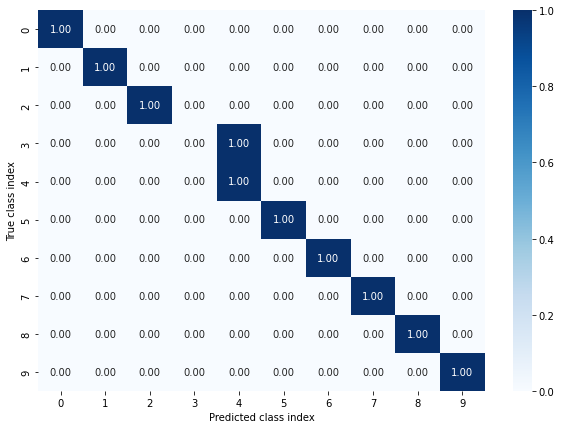

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [11]:
from ml4measurement.eb_ml_utils import plot_confusion_matrix

plot_confusion_matrix(targets, decoded)

In [12]:
print("target: ")
print(targets)
print("predictions (decoded):")
print(decoded)
print("classification errors (class distance):")
print(targets-decoded)

target: 
TensorCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
predictions (decoded):
TensorBase([0, 1, 2, 4, 4, 5, 6, 7, 8, 9])
classification errors (class distance):
TensorCategory([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0])


Analisi caso di predizione errata:

In [13]:
#caso di test predizione errata
test_img_index=3


In [14]:
print("test image: "+str(test_fnames[test_img_index]))
print("decoded: " +str(decoded[test_img_index].numpy()))
print("target: " +str(targets[test_img_index].numpy()))

test image: ..\data\images\mc_dropout_Exp1\monte_carlo__Exp_1-06_4_30.png
decoded: 4
target: 3


## OOD Detection


In [15]:
%pip install timm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\emanuele.buchicchio\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [16]:

%pip install cleanlab

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\emanuele.buchicchio\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import torch
import torchvision
import timm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

from cleanlab.outlier import OutOfDistribution
from cleanlab.rank import find_top_issues

### OOD detection using KNN distance from embedding

1. Use a pretrained neural network model from timm to extract feature embeddings of each image.
2. Use cleanlab to find naturally occurring outlier examples in the train_data (i.e. atypical images).
3. Find outlier examples in the test_data that do not stem from training data distribution (including out-of-distribution non-animal images).
4. Explore threshold selection for determining which images are outliers vs not.

Outlier scores are defined relative to the average distance (computed over feature values) between each example and its K nearest neighbors in the training data. Such scores have been found to be particularly effective for out-of-distribution detection, see this paper for more details:

Back to the Basics: Revisiting Out-of-Distribution Detection Baselines

Internally, cleanlab uses the sklearn.neighbors.NearestNeighbor class (with cosine distance) to find the K nearest neighbors, but you can easily use another KNN estimator with cleanlab’s OutOfDistribution class.

Inspired by https://docs.cleanlab.ai/stable/tutorials/outliers.html

In [18]:
# Generates 2048-dimensional feature embeddings from images
def embed_images(model, dataloader):
    feature_embeddings = []
    for data in dataloader:
        images, labels = data
        with torch.no_grad():
            embeddings = model(images)
            feature_embeddings.extend(embeddings.numpy())
    feature_embeddings = np.array(feature_embeddings)
    return feature_embeddings  # each row corresponds to embedding of a different image

In [19]:
# Load pretrained neural network
model = timm.create_model('resnet18', pretrained=True, num_classes=0)  # this is a pytorch network
model.eval()  # eval mode disables training-time operators (like batch normalization)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

In [20]:
train_feature_embeddings = embed_images(model, learn.dls.train)
print(f'Train embeddings pooled shape: {train_feature_embeddings.shape}')
test_feature_embeddings = embed_images(model, test_dl)
print(f'Test embeddings pooled shape: {test_feature_embeddings.shape}')

Train embeddings pooled shape: (1184, 512)
Test embeddings pooled shape: (10, 512)


In [21]:
ood = OutOfDistribution()
train_ood_features_scores = ood.fit_score(features=train_feature_embeddings)

top_train_ood_features_idxs = find_top_issues(quality_scores=train_ood_features_scores, top=15)
#visualize_outliers(top_train_ood_features_idxs, learn.dls.train.dataset)

Fitting OOD estimator based on provided features ...


In [22]:
train_ood_features_scores

array([0.9625549 , 0.9671498 , 0.97828734, ..., 0.98006713, 0.98210627,
       0.98188025], dtype=float32)

In [23]:
top_train_ood_features_idxs 

array([ 614,  681,  913,  457,  484,  955,  725,  533,  837,  870, 1123,
        656,  906,  452,  783], dtype=int64)

In [24]:
learn.dls.train.dataset

(#1190) [(PILImage mode=RGB size=640x480, TensorCategory(7)),(PILImage mode=RGB size=640x480, TensorCategory(3)),(PILImage mode=RGB size=640x480, TensorCategory(6)),(PILImage mode=RGB size=640x480, TensorCategory(7)),(PILImage mode=RGB size=640x480, TensorCategory(9)),(PILImage mode=RGB size=640x480, TensorCategory(9)),(PILImage mode=RGB size=640x480, TensorCategory(4)),(PILImage mode=RGB size=640x480, TensorCategory(6)),(PILImage mode=RGB size=640x480, TensorCategory(6)),(PILImage mode=RGB size=640x480, TensorCategory(6))...]

In [25]:
im=learn.dls.train.dataset[43][0]

In [26]:
im.shape

(480, 640)

<AxesSubplot:>

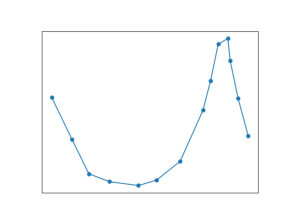

In [27]:
im.show()

In [28]:
test_ood_features_scores = ood.score(features=test_feature_embeddings)

In [29]:
test_ood_features_scores

array([0.9709932 , 0.9669145 , 0.9722501 , 0.9650716 , 0.96157014,
       0.9698551 , 0.9769958 , 0.96562594, 0.97062033, 0.9760067 ],
      dtype=float32)

Given outlier scores, how do we determine how many of the top-ranked examples in test_data should be marked as outliers?

Inevitably this has some true positive / false positive trade-off, so let’s suppose we want to ensure around at most 5% false positives. We can use the 5th percentile of the distribution of train_ood_features_scores (assuming the training data are in-distribution examples without outliers) as a hard score threshold below which to consider a test example an outlier.

Let’s plot the 5th percentile of the training outlier score distribution (shown as red line).

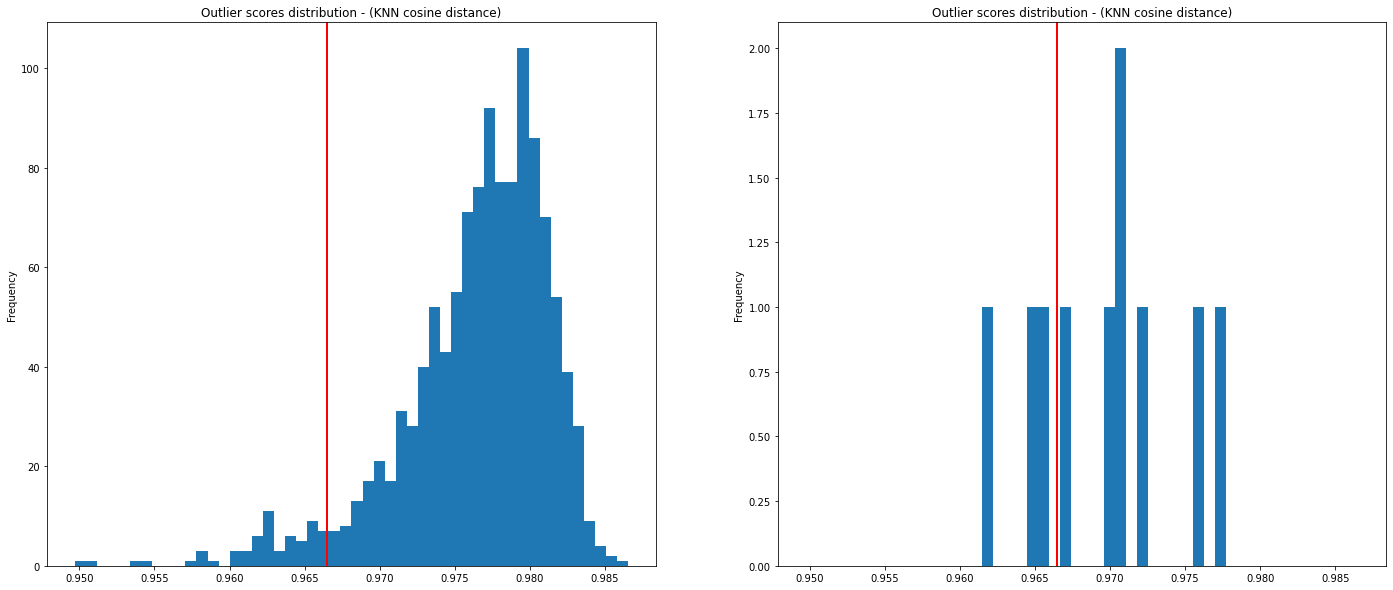

In [30]:
fifth_percentile = np.percentile(train_ood_features_scores, 5)  # 5th percentile of the train_data distribution

# Plot outlier_score distributions and the 5th percentile cutoff
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
plt_range = [min(train_ood_features_scores.min(),test_ood_features_scores.min()), \
             max(train_ood_features_scores.max(),test_ood_features_scores.max())]
axes[0].hist(train_ood_features_scores, range=plt_range, bins=50)
axes[0].set(title='Outlier scores distribution - (KNN cosine distance)', ylabel='Frequency')
axes[0].axvline(x=fifth_percentile, color='red', linewidth=2)
axes[1].hist(test_ood_features_scores, range=plt_range, bins=50)
axes[1].set(title='Outlier scores distribution - (KNN cosine distance)', ylabel='Frequency')
axes[1].axvline(x=fifth_percentile, color='red', linewidth=2)

plt.show()

In [31]:
fifth_percentile

0.9664625078439713

In [32]:
print("target class index: ")
print(targets.numpy())
print("predicted class index:")
print(decoded.numpy())
print("Classification is correct:")
print(targets.numpy()==decoded.numpy())
print("Is outlier: ")
print(test_ood_features_scores<fifth_percentile)

target class index: 
[0 1 2 3 4 5 6 7 8 9]
predicted class index:
[0 1 2 4 4 5 6 7 8 9]
Classification is correct:
[ True  True  True False  True  True  True  True  True  True]
Is outlier: 
[False False False  True  True False False  True False False]


In [33]:
test_ood_features_scores < fifth_percentile

array([False, False, False,  True,  True, False, False,  True, False,
       False])

###  Find outliers in the dataset using prediction entropy

From https://docs.fast.ai/learner.html#utils-function 

Get the predictions and targets on the ds_idx-th dbunchset or dl, optionally with_input and with_loss.

ds_idx: DataLoader to use for predictions if dl is None. 0: train. 1: valid


In [34]:
train_predictions, train_targets, train_decoded = learn.get_preds(ds_idx=0, with_decoded=True) # get predictions on the training set

In [35]:
ood = OutOfDistribution()
train_ood_predictions_scores = ood.fit_score(pred_probs=train_predictions.numpy(), labels=train_targets.numpy())

Fitting OOD estimator based on provided pred_probs ...


In [36]:
test_ood_predictions_scores = ood.score(pred_probs=predictions.numpy()) # get outlier scores for the test set predictions

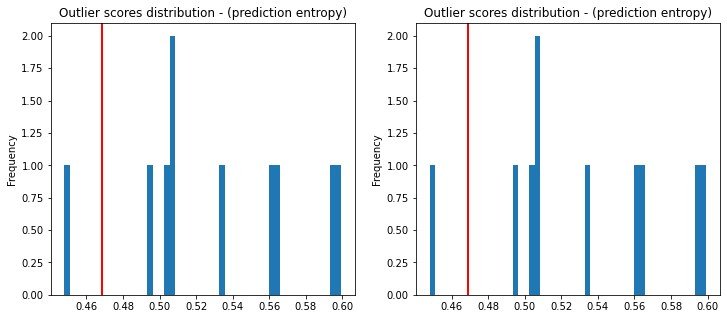

In [37]:
fifth_percentile2 = np.percentile(test_ood_predictions_scores, 5)  # 5th percentile of the train_data distribution

# Plot outlier_score distributions and the 5th percentile cutoff
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt_range = [min(test_ood_predictions_scores.min(),test_ood_predictions_scores.min()), \
             max(test_ood_predictions_scores.max(),test_ood_predictions_scores.max())]
axes[0].hist(test_ood_predictions_scores, range=plt_range, bins=50)
axes[0].set(title='Outlier scores distribution - (prediction entropy)', ylabel='Frequency')
axes[0].axvline(x=fifth_percentile2, color='red', linewidth=2)
axes[1].hist(test_ood_predictions_scores, range=plt_range, bins=50)
axes[1].set(title='Outlier scores distribution - (prediction entropy)', ylabel='Frequency')
axes[1].axvline(x=fifth_percentile2, color='red', linewidth=2)

plt.show()

In [38]:
test_dl.dataset

(#10) [(PILImage mode=RGB size=432x288, TensorCategory(0)),(PILImage mode=RGB size=432x288, TensorCategory(1)),(PILImage mode=RGB size=432x288, TensorCategory(2)),(PILImage mode=RGB size=432x288, TensorCategory(3)),(PILImage mode=RGB size=432x288, TensorCategory(4)),(PILImage mode=RGB size=432x288, TensorCategory(5)),(PILImage mode=RGB size=432x288, TensorCategory(6)),(PILImage mode=RGB size=432x288, TensorCategory(7)),(PILImage mode=RGB size=432x288, TensorCategory(8)),(PILImage mode=RGB size=432x288, TensorCategory(9))]

In [39]:
config["TEST_IMAGES_PATH"]

'../data/images/mc_dropout_Exp1'

In [40]:
test_fnames

(#10) [Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_10.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_100.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_20.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_30.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_40.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_50.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_60.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_70.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_80.png'),Path('../data/images/mc_dropout_Exp1/monte_carlo__Exp_1-06_4_90.png')]

In [41]:
print("target: ")
print(targets)
print("predictions (decoded):")
print(decoded)
print("classification errors (class distance):")
print(targets-decoded)

target: 
TensorCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
predictions (decoded):
TensorBase([0, 1, 2, 4, 4, 5, 6, 7, 8, 9])
classification errors (class distance):
TensorCategory([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0])


In [42]:
test_ood_predictions_scores < fifth_percentile2

array([False, False,  True, False, False, False, False, False, False,
       False])

## MC Dropout (MCD)

In [43]:
def MC_dropout_prediction(learner,data_loader,n_samples,activation=None):
# Call get_preds n times, then stack the predictions, yielding a tensor with shape [# of samples, batch_size, ...]
    dist_preds = []
    for i in range(n_samples):
        preds, targs, decoded = learn.get_preds(dl=test_dl, with_decoded=True, act=activation, cbs=[MCDropoutCallback()])
        dist_preds += [preds]

    y_pred_dist=torch.stack(dist_preds)
    return y_pred_dist

learn.predict (see https://docs.fast.ai/learner.html#Learner.predict )

It returns a tuple of three elements with, in reverse order, - the prediction from the model, potentially passed through the activation of the loss function (if it has one) - the decoded prediction, using the potential decodes method from it - the fully decoded prediction,

In [44]:
y_pred_dist_MC_logit=MC_dropout_prediction(learn,test_dl,50,activation=no_softMax)

In [45]:
y_pred_dist_MC=MC_dropout_prediction(learn,test_dl,50)


In [46]:
targets

TensorCategory([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Analisi caso di errore: indice 3. Prezizione classe 4 classe reale 3

In [47]:
print("test image: "+str(test_fnames[test_img_index]))
print("decoded: " +str(decoded[test_img_index].numpy()))
print("target: " +str(targets[test_img_index].numpy()))

test image: ..\data\images\mc_dropout_Exp1\monte_carlo__Exp_1-06_4_30.png
decoded: 4
target: 3


In [48]:
predicted_class = decoded[test_img_index].numpy()
true_class = targets[test_img_index].numpy()

d:\Temp\ipykernel_18892\3132398333.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)
d:\Temp\ipykernel_18892\3132398333.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


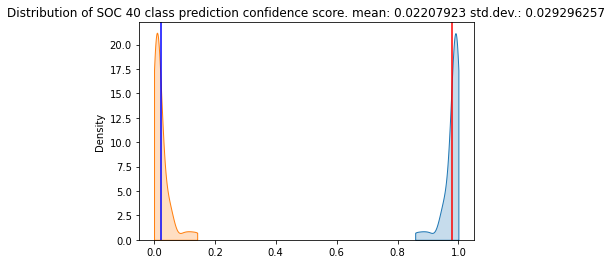

In [49]:
soc_classes=learn.dls.vocab
y_pred_soc=y_pred_dist_MC[:,test_img_index,predicted_class]
y_pred_point_soc=y_pred_dist_MC[:,test_img_index,predicted_class].mean(axis=0)
std_dev=y_pred_dist_MC[:,test_img_index,predicted_class].std(axis=0)
sns.kdeplot(y_pred_soc, cut=0, shade=True)
plt.axvline(y_pred_point_soc, color='red')

y_pred_soc=y_pred_dist_MC[:,test_img_index,true_class]
y_pred_point_soc=y_pred_dist_MC[:,test_img_index,true_class].mean(axis=0)
std_dev=y_pred_dist_MC[:,test_img_index,true_class].std(axis=0)
sns.kdeplot(y_pred_soc, cut=0, shade=True)
plt.axvline(y_pred_point_soc, color='blue')

plt.title("Distribution of SOC "+ soc_classes[predicted_class]+" class prediction confidence score. mean: "+str(y_pred_point_soc.numpy())+" std.dev.: "+str(std_dev.numpy()))
plt.show()

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


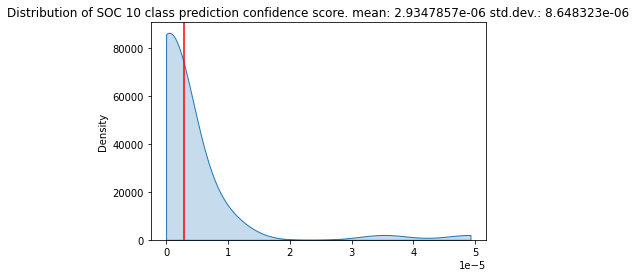

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


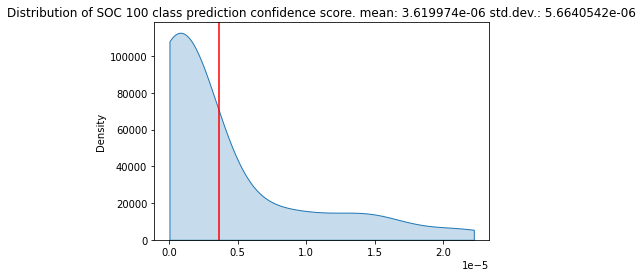

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


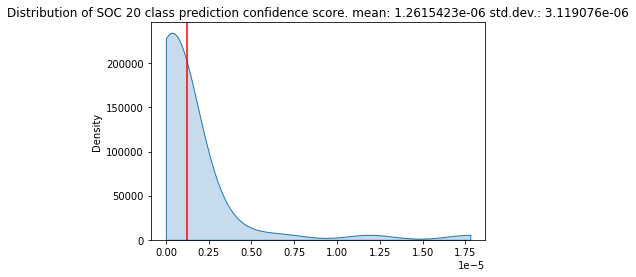

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


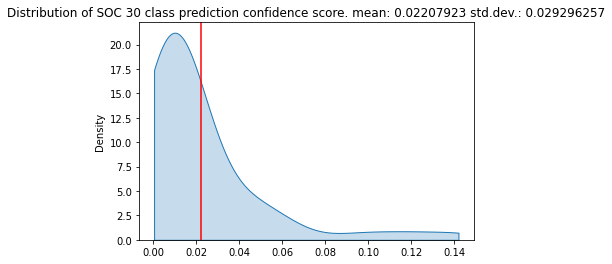

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


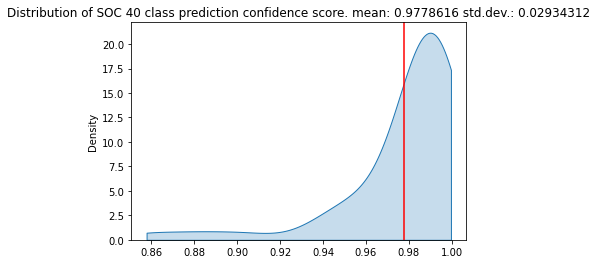

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


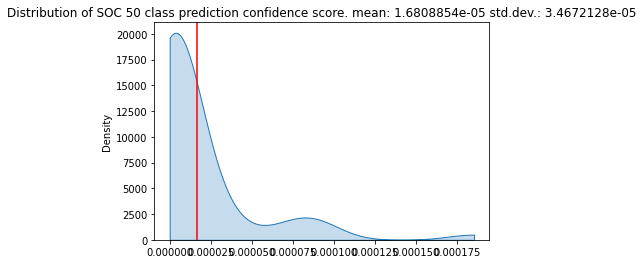

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


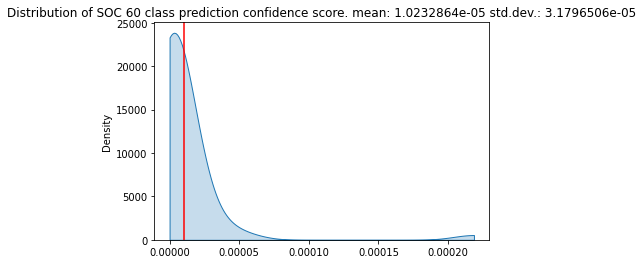

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


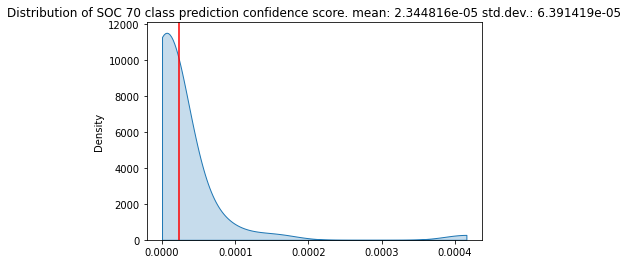

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


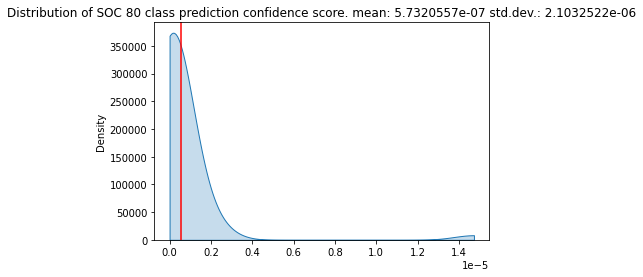

d:\Temp\ipykernel_18892\3487058390.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_soc, cut=0, shade=True)


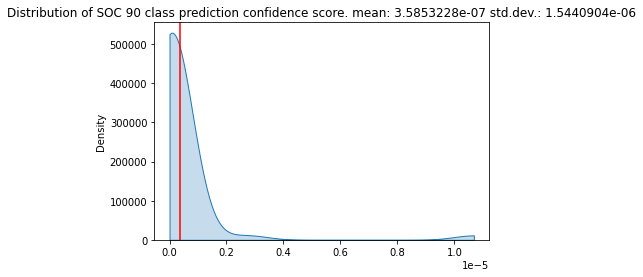

In [50]:
soc_classes=learn.dls.vocab
for class_idx in range(len(soc_classes)):
    y_pred_soc=y_pred_dist_MC[:,test_img_index,class_idx]
    y_pred_point_soc=y_pred_dist_MC[:,test_img_index,class_idx].mean(axis=0)
    std_dev=y_pred_dist_MC[:,test_img_index,class_idx].std(axis=0)
    sns.kdeplot(y_pred_soc, cut=0, shade=True)
    plt.axvline(y_pred_point_soc, color='red')
    plt.title("Distribution of SOC "+ soc_classes[class_idx]+" class prediction confidence score. mean: "+str(y_pred_point_soc.numpy())+" std.dev.: "+str(std_dev.numpy()))
    plt.show()

Analisi distribuzione delle predizioni per il caso di test con predizione errats

## Monte Carlo with noisy input

Mer metodo MCS utilizzo 50 ottenuti aggiungendo rumore gaussiano all curva EIS del caso di test con dev.std 0.001 ohm.

In [51]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/monte_carlo_Exp1_batt04_30"#"../data/test_images/mc_dropout_test_Exp_0"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)
learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [52]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)

In [53]:
test_fnames

(#50) [Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4001_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4002_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4003_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4004_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4005_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4006_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4007_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4008_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4009_30.png'),Path('../data/images/monte_carlo_Exp1_batt04_30/monte_carlo__Exp_1-06_4010_30.png')...]

In [54]:
preds, targs, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

In [55]:
learn.dls.vocab

['10', '100', '20', '30', '40', '50', '60', '70', '80', '90']

In [56]:
decoded

TensorBase([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4])

su 5o campioni 49 predizioni sono errate (SOC 40 (indice 4) e solo una è corretta SOC 30 (indice 3)). La probabilità assegnata dal SoftMax alla classe 4 è molto alta

In [57]:
preds[:,4]

TensorBase([0.9885, 0.9992, 0.9725, 0.9993, 0.9993, 0.7968, 0.9997, 0.9942, 0.9891,
        0.9143, 0.2019, 0.9996, 0.9173, 0.9772, 0.9941, 0.9977, 0.9878, 0.9632,
        0.9998, 0.4623, 0.9758, 0.9820, 0.9903, 0.9989, 0.9973, 0.6333, 0.5537,
        0.9998, 0.9998, 0.9990, 0.9996, 0.9961, 0.9998, 0.9948, 0.9997, 0.9963,
        0.9972, 0.9344, 0.9495, 0.9974, 0.8345, 0.9999, 0.9999, 0.9982, 0.9940,
        0.9998, 0.9947, 0.9873, 0.9750, 0.9918])

In [58]:
y_pred_point_4=preds[:,4].mean(axis=0)

In [59]:
print(y_pred_point_4)

TensorBase(0.9385)


In [60]:
std_dev_4=preds[:,4].std(axis=0)

In [61]:
print(std_dev_4)

TensorBase(0.1542)


In [62]:
preds[:,4]

TensorBase([0.9885, 0.9992, 0.9725, 0.9993, 0.9993, 0.7968, 0.9997, 0.9942, 0.9891,
        0.9143, 0.2019, 0.9996, 0.9173, 0.9772, 0.9941, 0.9977, 0.9878, 0.9632,
        0.9998, 0.4623, 0.9758, 0.9820, 0.9903, 0.9989, 0.9973, 0.6333, 0.5537,
        0.9998, 0.9998, 0.9990, 0.9996, 0.9961, 0.9998, 0.9948, 0.9997, 0.9963,
        0.9972, 0.9344, 0.9495, 0.9974, 0.8345, 0.9999, 0.9999, 0.9982, 0.9940,
        0.9998, 0.9947, 0.9873, 0.9750, 0.9918])

d:\Temp\ipykernel_18892\2217798891.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,4], cut=0, shade=True)


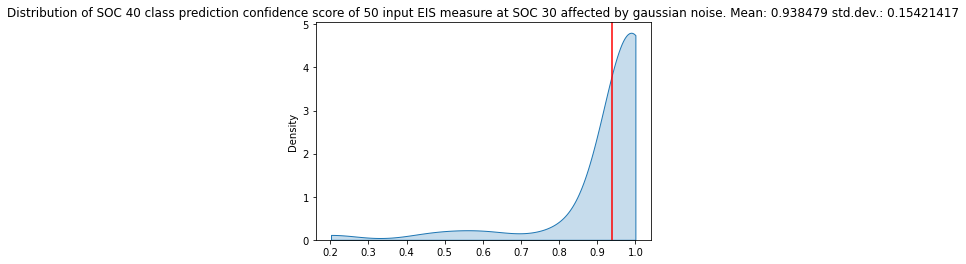

In [63]:

sns.kdeplot(preds[:,4], cut=0, shade=True)
plt.axvline(y_pred_point_4, color='red')
plt.title("Distribution of SOC 40 class prediction confidence score of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_4.numpy())+" std.dev.: "+str(std_dev_4.numpy()))
#plt.xlim([0.9999,1])
plt.show()

In [64]:
preds[:,3]

TensorBase([1.1446e-02, 5.7234e-04, 2.7525e-02, 5.5557e-04, 7.0716e-04, 2.0300e-01,
        2.8897e-04, 5.1612e-03, 1.0819e-02, 8.5637e-02, 7.9803e-01, 3.4184e-04,
        8.2199e-02, 2.2814e-02, 5.8611e-03, 2.2389e-03, 1.1919e-02, 3.6658e-02,
        1.1392e-04, 5.3761e-01, 2.4017e-02, 1.7894e-02, 9.6571e-03, 8.0646e-04,
        2.4644e-03, 3.6650e-01, 4.4607e-01, 1.3241e-04, 1.6926e-04, 8.2156e-04,
        3.0960e-04, 3.8232e-03, 1.6546e-04, 4.6711e-03, 2.7201e-04, 3.6183e-03,
        2.7790e-03, 6.5507e-02, 4.9835e-02, 2.5623e-03, 1.6513e-01, 6.4420e-05,
        1.7297e-05, 1.8271e-03, 5.9901e-03, 1.5124e-04, 5.0286e-03, 1.2625e-02,
        2.4946e-02, 8.2218e-03])

d:\Temp\ipykernel_18892\766403924.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,3], cut=0, shade=True)


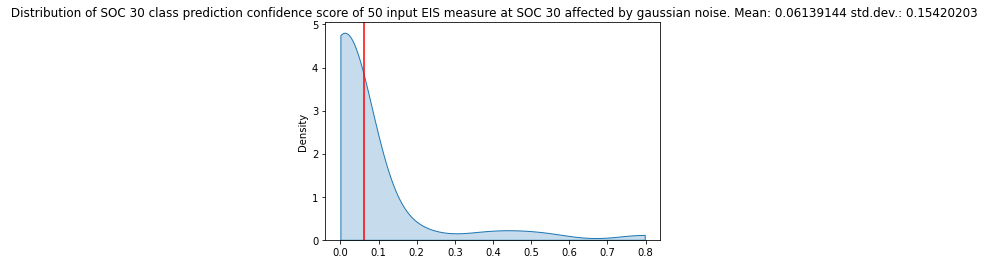

In [65]:
std_dev_3=preds[:,3].std(axis=0)
y_pred_point_3=preds[:,3].mean(axis=0)
sns.kdeplot(preds[:,3], cut=0, shade=True)
plt.axvline(y_pred_point_3, color='red')
plt.title(" Distribution of SOC 30 class prediction confidence score of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_3.numpy())+" std.dev.: "+str(std_dev_3.numpy()))
#plt.xlim([0.9999,1])
plt.show()

mean soc40: 0.9778616
 MCD std. dev. soc40: 0.02934312


d:\Temp\ipykernel_18892\2532017194.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], cut=0, shade=True, color='blue')
d:\Temp\ipykernel_18892\2532017194.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MC[:,test_img_index,3], cut=0, shade=True, color='orange')


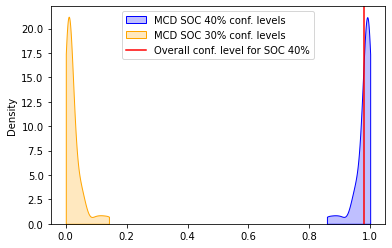

In [66]:
MC_mean_40= y_pred_dist_MC[:,test_img_index,4].mean(axis=0).numpy()
MC_std_40= y_pred_dist_MC[:,test_img_index,4].std(axis=0).numpy()
print("mean soc40: "+str(MC_mean_40))
print(" MCD std. dev. soc40: "+str(MC_std_40))

sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], cut=0, shade=True, color='blue')
sns.kdeplot(y_pred_dist_MC[:,test_img_index,3], cut=0, shade=True, color='orange')
plt.axvline(MC_mean_40, color='red')
#plt.title("SOC 30 and SOC 40 () class prediction probability of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_3.numpy())+" std.dev.: "+str(std_dev_3.numpy()))
#plt.xlim([0.9999,1])
plt.legend(['MCD SOC 40% conf. levels ','MCD SOC 30% conf. levels ','Overall conf. level for SOC 40%'], loc='upper center')
plt.show()

In [67]:
print("MCS std. dev. soc40: "+str(preds[:,4].std(axis=0).numpy()))

MCS std. dev. soc40: 0.15421417


d:\Temp\ipykernel_18892\879026817.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,4], cut=0, shade=True, color='blue')
d:\Temp\ipykernel_18892\879026817.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,3], cut=0, shade=True, color='orange')


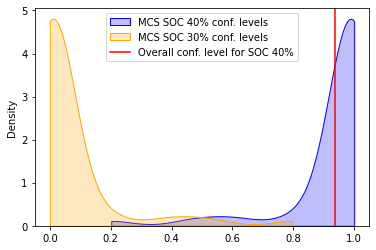

In [68]:

sns.kdeplot(preds[:,4], cut=0, shade=True, color='blue')
sns.kdeplot(preds[:,3], cut=0, shade=True, color='orange')
plt.axvline(y_pred_point_4, color='red')
#plt.title("SOC 30 and SOC 40 () class prediction probability of 50 input EIS measure at SOC 30 affected by gaussian noise. Mean: "+ str(y_pred_point_3.numpy())+" std.dev.: "+str(std_dev_3.numpy()))
#plt.xlim([0.9999,1])
plt.legend(['MCS SOC 40% conf. levels ','MCS SOC 30% conf. levels ','Overall conf. level for SOC 40%'], loc='upper center')
plt.show()

Confronto tra le distribuzioni delle predizioni con MCD e MCS per il caso di errore

d:\Temp\ipykernel_18892\3935454470.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], color='orange', cut=0, shade=True)
d:\Temp\ipykernel_18892\3935454470.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(preds[:,4], cut=0, shade=True, color='lightblue')


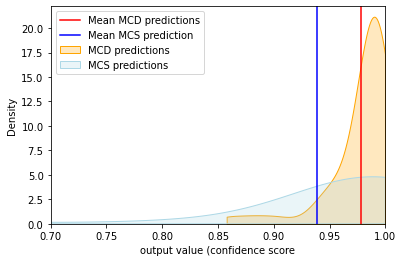

In [69]:
plt.axvline(y_pred_dist_MC[:,test_img_index,4].mean(axis=0), color='red')
plt.axvline(y_pred_point_4, color='blue')
sns.kdeplot(y_pred_dist_MC[:,test_img_index,4], color='orange', cut=0, shade=True)
sns.kdeplot(preds[:,4], cut=0, shade=True, color='lightblue')
plt.xlim([0.7,1])
plt.xlabel("output value (confidence score")
plt.ylabel("Density")
plt.legend(["Mean MCD predictions","Mean MCS prediction","MCD predictions","MCS predictions"])

# Confronto MCD e MCS in caso predizione Corretta

## MCD

In [70]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/mc_dropout_Exp1"#"../data/test_images/mc_dropout_test_Exp_0"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)
learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [71]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)
predictions, targets, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

#confidence score for each class without softmax
predictions_logit  = learn.get_preds(dl=test_dl, with_decoded=True, act=no_softMax)

In [72]:
y_pred_dist_MC=MC_dropout_prediction(learn,test_dl,50)
y_pred_dist_MC_logit=MC_dropout_prediction(learn,test_dl,50,activation=no_softMax)

In [73]:
test_img_index=0
print("test image: "+str(test_fnames[test_img_index]))
print("decoded: " +str(decoded[test_img_index].numpy()))
print("target: " +str(targets[test_img_index].numpy()))

test image: ..\data\images\mc_dropout_Exp1\monte_carlo__Exp_1-06_4_10.png
decoded: 0
target: 0


## MCS

In [74]:
# BUILD DATA LOADER
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/monte_carlo_Exp1_batt06_Meas4_Soc10"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)
learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [75]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)
predictions, targets, decoded = learn.get_preds(dl=test_dl, with_decoded=True)
#confidence score for each class without softmax
predictions_logit  = learn.get_preds(dl=test_dl, with_decoded=True, act=no_softMax)

In [76]:
decoded

TensorBase([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

In [77]:
y_pred_dist_MCD = y_pred_dist_MC[:,0,]
y_pred_dist_MCD_logit = y_pred_dist_MC_logit[:,0,]

In [78]:
y_pred_dist_MCD.size()

torch.Size([50, 10])

In [79]:
y_pred_dist_MCS = predictions
y_pred_dist_MCS_logit = predictions_logit[0]

In [135]:
predictions_logit[2]

TensorBase([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

In [80]:
y_pred_dist_MCS.size()

torch.Size([50, 10])

In [81]:
class_index=0

d:\Temp\ipykernel_18892\3129834823.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='orange', cut=0, shade=True)
d:\Temp\ipykernel_18892\3129834823.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')


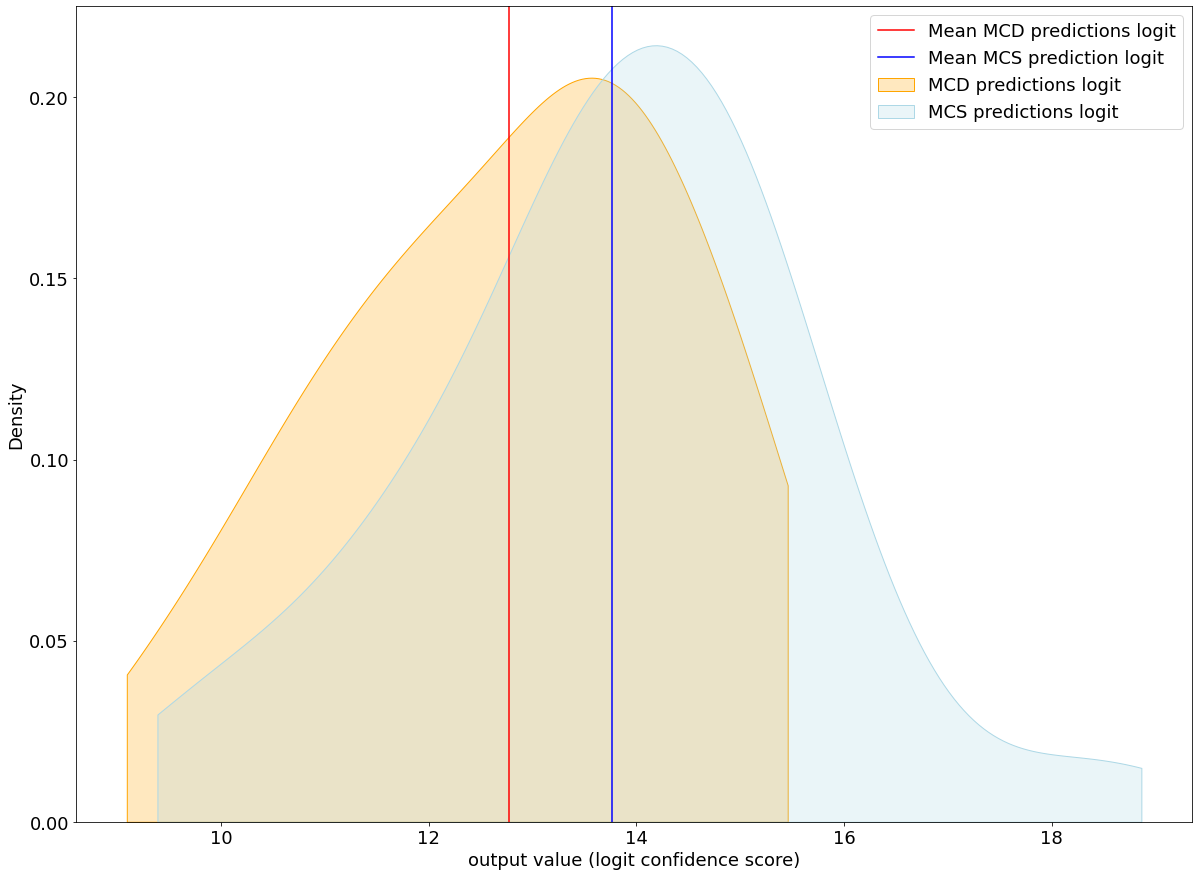

In [82]:
#set the size of the figure
plt.figure(figsize=(20,15))
#label font size
plt.rcParams.update({'font.size': 18})

plt.axvline(y_pred_dist_MCD_logit[:,class_index].mean(axis=0), color='red')
plt.axvline(y_pred_dist_MCS_logit[:,class_index].mean(axis=0), color='blue')
sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='orange', cut=0, shade=True)
sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')
#plt.xlim([0.95,1])
#plt.ylim([0,200])

plt.xlabel("output value (logit confidence score)")
plt.ylabel("Density")
plt.legend(["Mean MCD predictions logit","Mean MCS prediction logit","MCD predictions logit","MCS predictions logit"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_logit2.png")

d:\Temp\ipykernel_18892\716038089.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD[:,class_index], color='orange', cut=0, shade=True)
d:\Temp\ipykernel_18892\716038089.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS[:,class_index], cut=0, shade=True, color='lightblue')


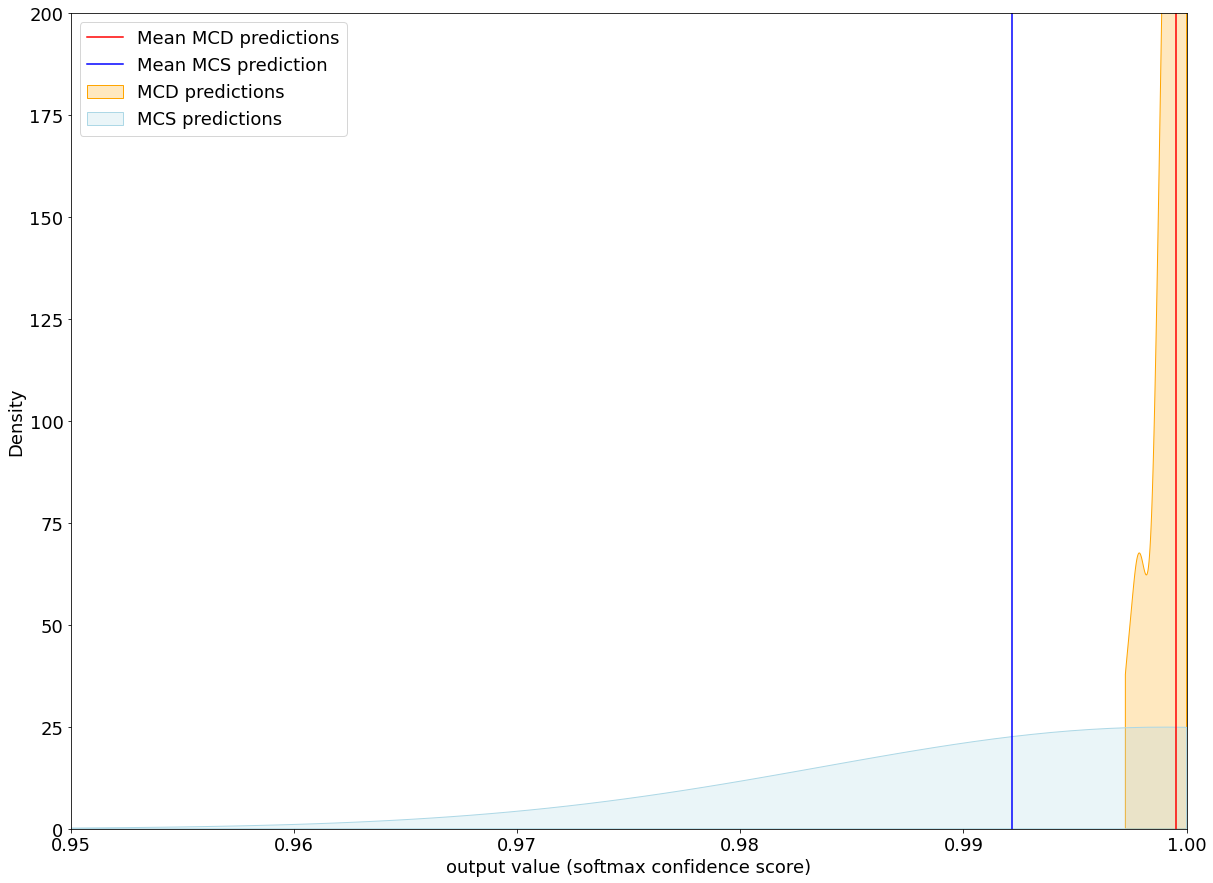

In [83]:
plt.figure(figsize=(20,15))
plt.axvline(y_pred_dist_MCD[:,class_index].mean(axis=0), color='red')
plt.axvline(y_pred_dist_MCS[:,class_index].mean(axis=0), color='blue')
sns.kdeplot(y_pred_dist_MCD[:,class_index], color='orange', cut=0, shade=True)
sns.kdeplot(y_pred_dist_MCS[:,class_index], cut=0, shade=True, color='lightblue')
plt.xlim([0.95,1])
plt.ylim([0,200])
plt.xlabel("output value (softmax confidence score)")
plt.ylabel("Density")
plt.legend(["Mean MCD predictions","Mean MCS prediction","MCD predictions","MCS predictions"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_softmax2.png")

In [84]:
y_pred_dist_MCD.std()

TensorBase(0.3001)

In [85]:
y_pred_dist_MCS.std()

TensorBase(0.2981)

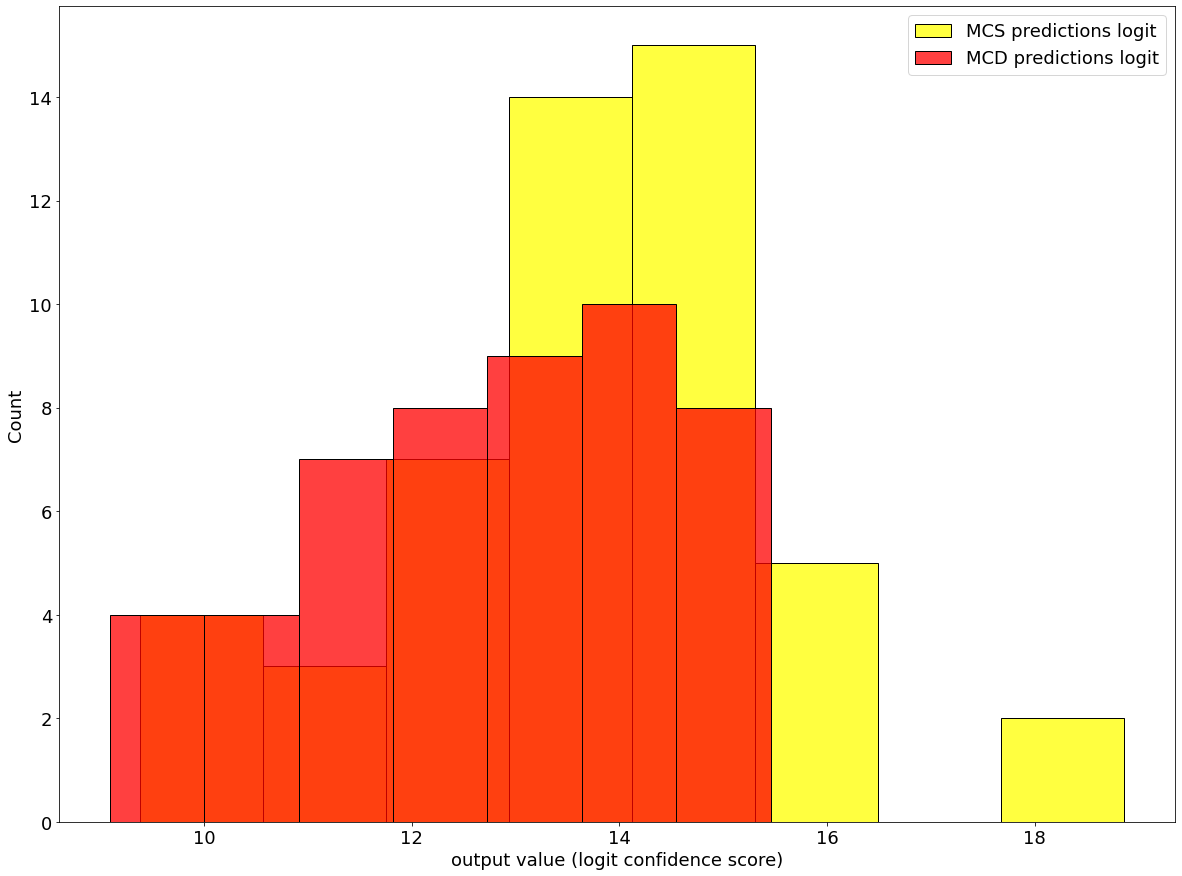

In [86]:
plt.figure(figsize=(20,15))
sns.histplot(y_pred_dist_MCS_logit[:,class_index], color='yellow')
sns.histplot(y_pred_dist_MCD_logit[:,class_index], color='red')
#plt.xlim([0.9825,1])
#plt.ylim([0,200])
plt.xlabel("output value (logit confidence score)")
plt.legend(["MCS predictions logit","MCD predictions logit"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_logit.png")

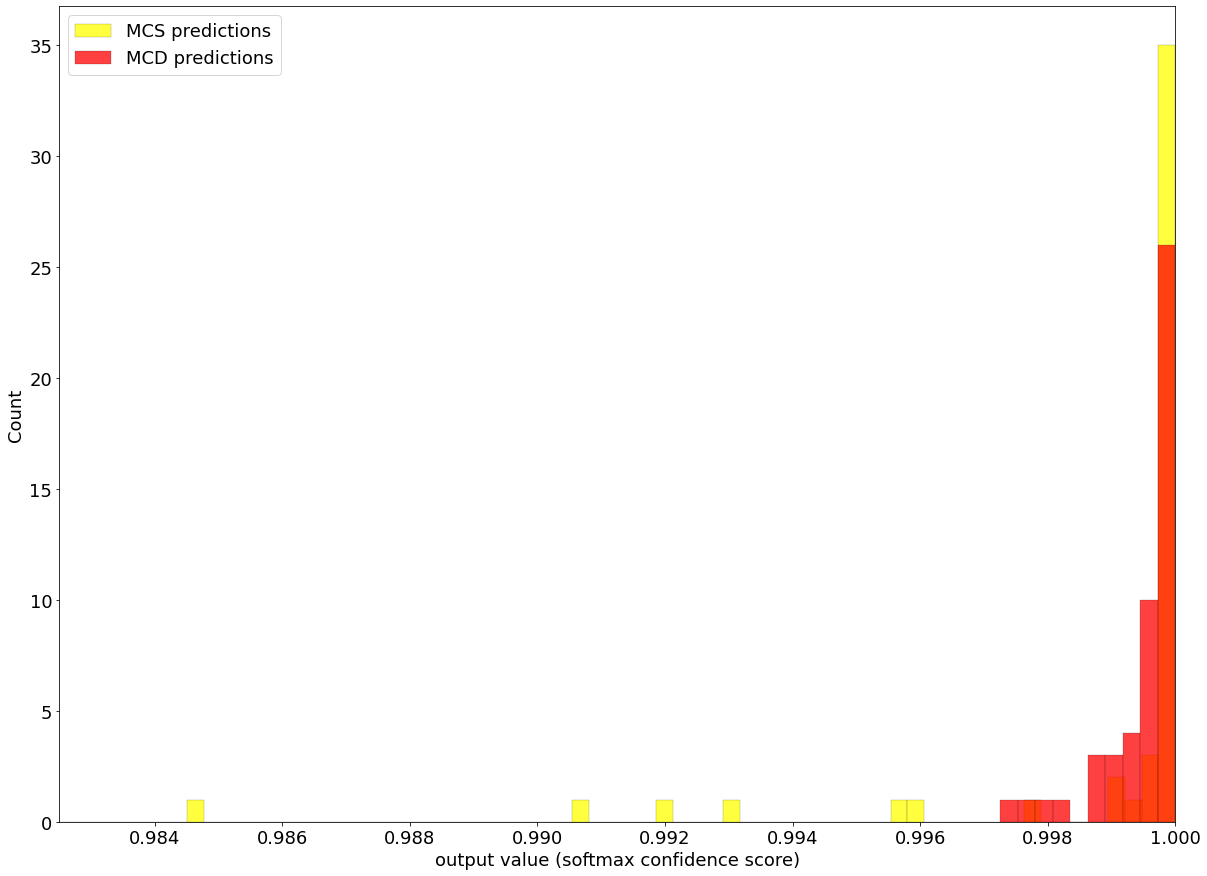

In [87]:
plt.figure(figsize=(20,15))
sns.histplot(y_pred_dist_MCS[:,class_index], color='yellow')
sns.histplot(y_pred_dist_MCD[:,class_index], color='red')
plt.xlim([0.9825,1])
#plt.ylim([0,200])
plt.xlabel("output value (softmax confidence score)")
plt.legend(["MCS predictions","MCD predictions"])

# save the figure to disk
plt.savefig("MCD_MCS_comparison_softmax.png")

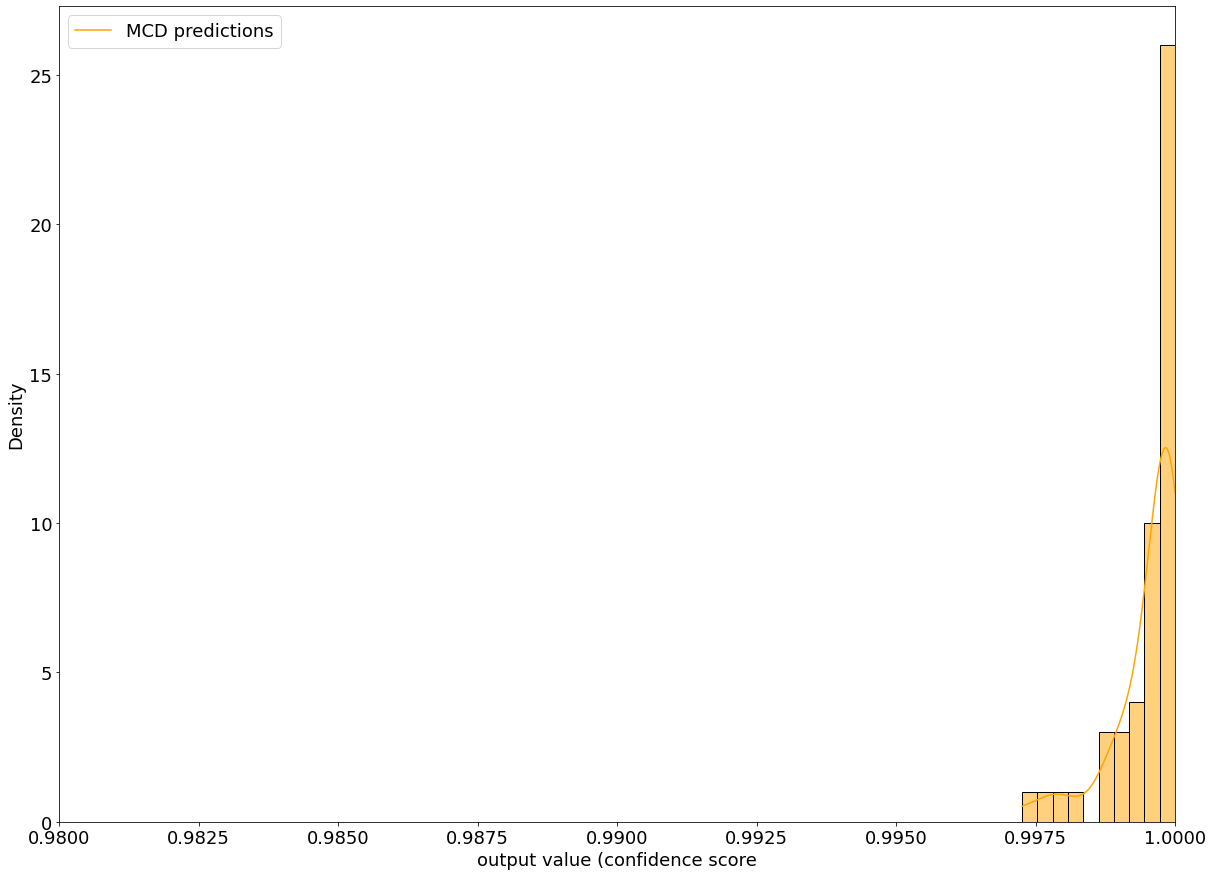

In [88]:
plt.figure(figsize=(20,15))
#plt.axvline(y_pred_dist_MCD[:,class_index].mean(axis=0), color='red')
#plt.axvline(y_pred_dist_MCS[:,class_index].mean(axis=0), color='blue')
sns.histplot(y_pred_dist_MCD[:,class_index], color='orange', kde=True )
#sns.histplot(y_pred_dist_MCS[:,class_index], color='lightblue')
plt.xlim([0.98,1])
#plt.ylim([0,200])
plt.xlabel("output value (confidence score")
plt.ylabel("Density")
plt.legend(["MCD predictions"])

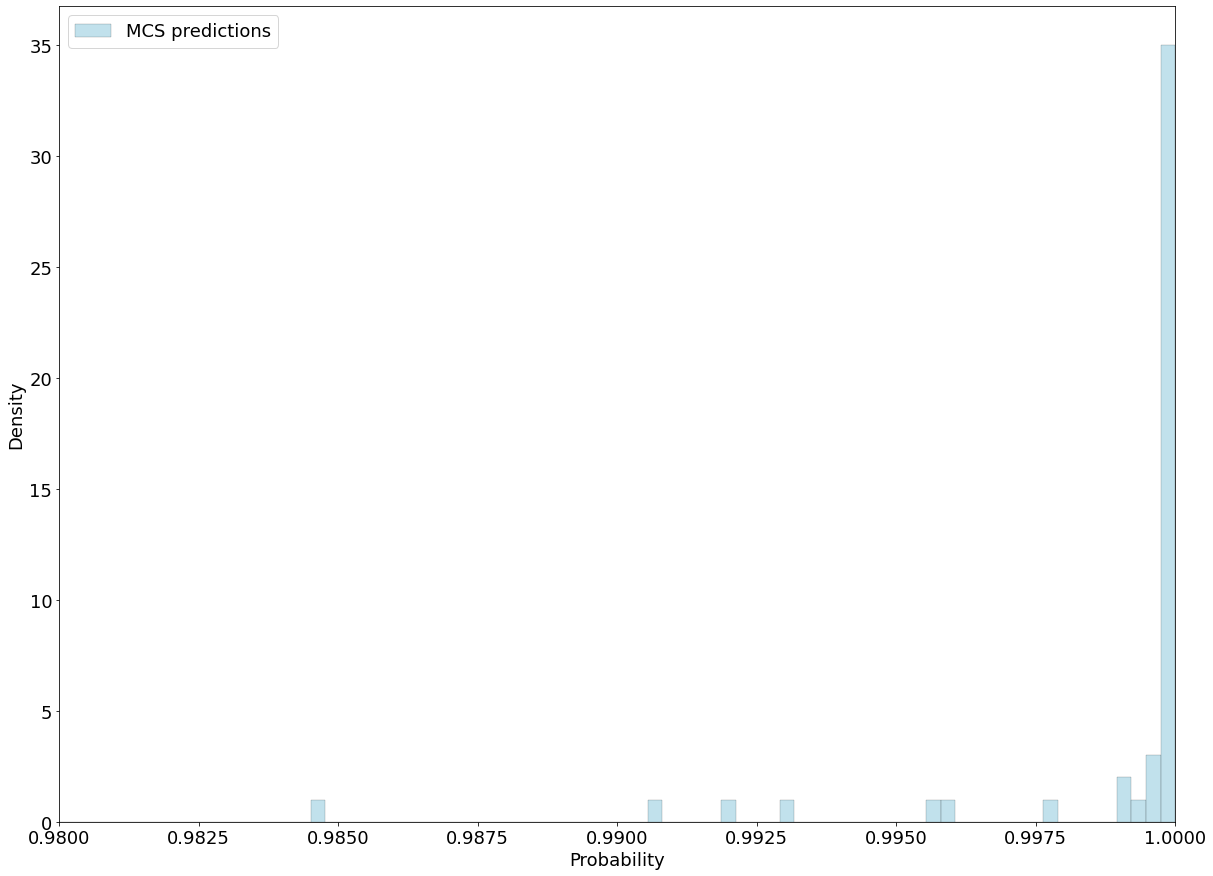

In [89]:
plt.figure(figsize=(20,15))
#plt.axvline(y_pred_dist_MCD[:,class_index].mean(axis=0), color='red')
#plt.axvline(y_pred_dist_MCS[:,class_index].mean(axis=0), color='blue')
#sns.histplot(y_pred_dist_MCD[:,class_index], color='orange', )
sns.histplot(y_pred_dist_MCS[:,class_index], color='lightblue')
plt.xlim([0.98,1])
#plt.ylim([0,200])
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend(["MCS predictions"])

# MCD and MCS combination

Combine MCS and MCD.

1. build a data loader and a learner on test dataset augmented for Monte Carlo Simulation for a SOC 10 test case with correct prediction 

In [90]:
class_index=0 # SOC 10%

In [91]:
# BUILD DATA LOADER 
config['ExperimentName'] = "Paper_MES_v2_single__Exp_1"
config['IMAGES_PATH'] = config['root_images_path']+"/"+config['ExperimentName']
config["TEST_IMAGES_PATH"]= "../data/images/monte_carlo_Exp1_batt06_Meas4_Soc10"
saved_weights = "Paper_MES_v2_single__Exp_1_1674295349.009869_SAVED" #"Paper_MES_v2_single__Exp_0_1674294950.893247_SAVED"

# BUILD LEARNER
learn = build_learner(config)
learn = learn.load(saved_weights)

Setting-up type transforms pipelines
Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying PILBase.create gives
      PILImage mode=RGB size=640x480
  Pipeline: RegexLabeller -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      ..\data\images\Paper_MES_v2_single__Exp_1\Paper_MES_v2_single__Exp_1-03_8009_70.png
    applying RegexLabeller gives
      70
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=640x480, TensorCategory(7))


Found 1700 items
2 datasets of sizes 1190,510
Setting up Pipeline: PILBase.create
Setting up Pipeline: RegexLabeller -> Categorize -- {'vocab'

In [92]:
test_fnames= get_image_files(config["TEST_IMAGES_PATH"])
# Data loader for test set
test_dl = learn.dls.test_dl(test_fnames,with_labels=True)

In [127]:
len(test_fnames)

50

2. Execute MCS inferences inside MCD inferece loop. two time 1. without softmax output layer 2. with softmax output layer

In [93]:
y_pred_dist_MCD_MCS_logit=MC_dropout_prediction(learn,test_dl,50,activation=no_softMax) #logit

In [94]:
y_pred_dist_MCD_MCS=MC_dropout_prediction(learn,test_dl,50) #softmax

analisi predizione in caso di predizione corretta: config["TEST_IMAGES_PATH"]= "../data/images/monte_carlo_Exp1_batt06_Meas4_Soc10"

In [95]:
learn.dls.vocab[class_index]

'10'

In [152]:
y_pred_dist_MCD_logit[:,0]

TensorBase([ 9.0911, 11.2215, 13.4564, 14.0156, 11.7768,  9.2053, 12.0317, 15.3072,
        13.7539, 11.0954, 11.3553, 13.9537, 12.3426, 12.0541, 13.3853, 15.1488,
        12.6787, 14.4450, 13.2096, 11.8766, 14.9048, 13.4722, 12.4043, 14.1105,
        13.2599, 13.0871, 15.4563, 15.4187, 11.7056,  9.9680, 13.2787, 14.0053,
        11.0126, 11.6468, 10.6155, 13.7533, 14.7831, 13.0484, 10.5539, 12.9309,
        14.0060, 14.9248, 14.2393, 12.4726, 14.1521, 10.3061, 12.3854, 10.7501,
        14.7338,  9.8801])

In [157]:
len(y_pred_dist_MCS_logit[:,0])

50

In [158]:
y_pred_dist_MCD_MCS_logit[:,:,1]

TensorBase([[-4.4864, -3.7741, -5.7054,  ...,  2.6477, -7.8449, -4.9348],
        [-6.6872, -4.1079, -3.8140,  ..., -1.3637, -5.3658, -3.9042],
        [-4.2377, -5.4987, -5.9205,  ...,  0.2043, -4.8087, -3.2571],
        ...,
        [-7.3790, -4.6460, -3.1829,  ...,  0.8860, -6.4228, -4.9220],
        [-5.4965, -5.8288, -4.2837,  ..., -0.3450, -4.7362, -2.3294],
        [-5.1594, -5.3367, -5.6091,  ...,  0.8320, -8.8368, -4.6265]])

In [173]:
y_pred_dist_MCD_logit[:,class_index]

TensorBase([-5.2366, -4.8119, -4.0842, -3.6065, -4.8206, -4.9834, -7.2412, -5.1978,
        -5.9532, -6.2208, -5.7634, -5.4167, -5.7099, -7.5055, -7.7630, -8.4275,
        -6.0653, -6.2972, -4.1220, -6.4191, -7.0793, -6.5562, -5.4097, -7.0473,
        -4.8540, -6.9766, -5.3405, -6.3008, -5.3434, -4.2836, -5.3713, -4.9881,
        -4.7361, -4.1956, -5.9177, -4.8425, -6.1659, -5.3419, -6.1580, -5.6861,
        -7.2017, -6.9798, -6.2148, -7.4338, -4.4517, -4.8385, -5.8983, -4.7482,
        -4.9030, -6.7632])

In [193]:
y_pred_dist_MCD_logit[:,class_index].mean(axis=0)

TensorBase(-5.7535)

In [182]:
(y_pred_dist_MCD_MCS_logit[:,:,class_index]).shape
#y_pred_dist_MCD_MCS_logit[:,:,class_index]

torch.Size([50, 50])

In [194]:
y_pred_dist_MCS_logit[:,class_index].mean(axis=0)

TensorBase(-6.0507)

In [190]:
# reshape from matrix to vector
y_pred_dist_MCD_MCS_logit_vect = y_pred_dist_MCD_MCS_logit[:,:,class_index].reshape(-1,1)

In [192]:
y_pred_dist_MCD_MCS_logit_vect.mean()

TensorBase(-6.0854)

d:\Temp\ipykernel_18892\2562310807.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
d:\Temp\ipykernel_18892\2562310807.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
d:\Temp\ipykernel_18892\2562310807.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,:,class_index].reshape(-1,1), cut=0, shade=True, color='lightblue')


<AxesSubplot:ylabel='Density'>

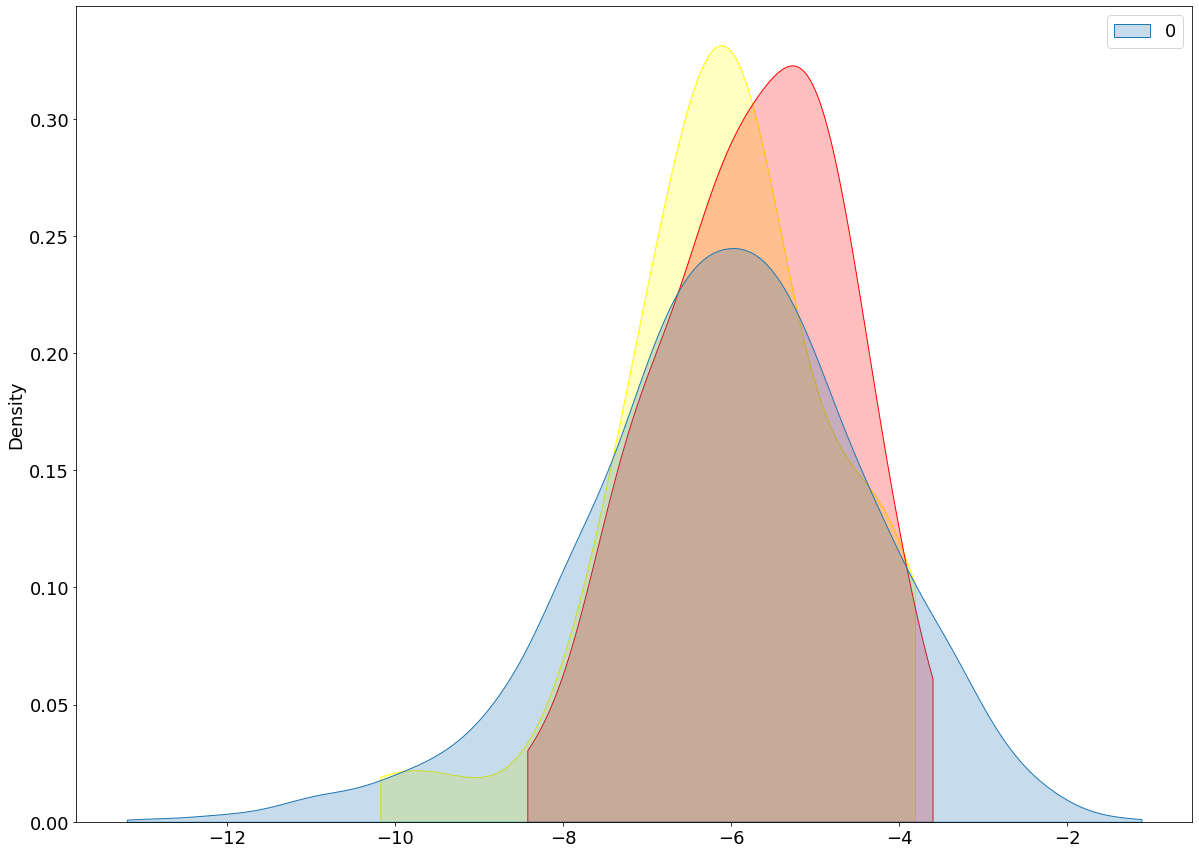

In [196]:
plt.figure(figsize=(20,15))
#label font size
plt.rcParams.update({'font.size': 18})

sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,:,class_index].reshape(-1,1), cut=0, shade=True, color='lightblue')

In [214]:
def plot_MC_distribution_softmax(class_index,x_lim=[0,95,1],y_lim=[0,200]):
    #set the size of the figure
    plt.figure(figsize=(20,15))
    #label font size
    plt.rcParams.update({'font.size': 18})

    sns.kdeplot(y_pred_dist_MCS[:,class_index], cut=0, shade=True, color='yellow')
    sns.kdeplot(y_pred_dist_MCD[:,class_index], color='red', cut=0, shade=True)
    sns.kdeplot(y_pred_dist_MCD_MCS[:,:,class_index].reshape(-1,1), cut=0, shade=True, color='lightblue')

    plt.xlim=x_lim
    plt.ylim=y_lim

    plt.xlabel("Prediction output value (softmax confidence score) for class SOC"+learn.dls.vocab[class_index]+"%")
    plt.legend(["MCS","MCD", "MCS nested in MCD"])

    plt.ylabel("Density")
    plt.savefig("MCD_MCS_MCS_nested_MCD_comparison_softmax_SOC"+learn.dls.vocab[class_index]+".png") 

In [215]:
def plot_MC_distribution_logit(class_index):
    #set the size of the figure
    plt.figure(figsize=(20,15))
    #label font size
    plt.rcParams.update({'font.size': 18})

    sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
    sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
    sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,:,class_index].reshape(-1,1), cut=0, shade=True, color='lightblue')

    #plt.xlim([0.95,1])
    #plt.ylim([0,200])

    plt.xlabel("Prediction output value (logit) for class SOC"+learn.dls.vocab[class_index]+"%")
    plt.legend(["MCS","MCD", "MCS nested in MCD"])

    plt.ylabel("Density")
    plt.savefig("MCD_MCS_MCS_nested_MCD_comparison_logit_SOC"+learn.dls.vocab[class_index]+".png")    

In [216]:
def histplot_MC_distribution_logit(class_index):
    #set the size of the figure
    plt.figure(figsize=(20,15))
    #label font size
    plt.rcParams.update({'font.size': 18})

    sns.histplot(y_pred_dist_MCS_logit[:,class_index], color='yellow')
    sns.histplot(y_pred_dist_MCD_logit[:,class_index], color='red')
    sns.histplot(y_pred_dist_MCD_MCS_logit[:,:,class_index].reshape(-1,1), color='lightblue')

    #plt.xlim=x_lim
    #plt.ylim=y_lim

    plt.xlabel("Prediction output value (logit) for class SOC"+learn.dls.vocab[class_index]+"%")
    plt.ylabel("Count")
    plt.legend(["MCS","MCD", "MCS nested in MCD"])
    plt.savefig("MCD_MCS_MCS_nested_MCD_hist_comparison_logit_SOC"+learn.dls.vocab[class_index]+".png") 

d:\Temp\ipykernel_18892\1866196439.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS[:,class_index], cut=0, shade=True, color='yellow')
d:\Temp\ipykernel_18892\1866196439.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD[:,class_index], color='red', cut=0, shade=True)
d:\Temp\ipykernel_18892\1866196439.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_MCS[:,:,class_index].reshape(-1,1), cut=0, shade=True, color='lightblue')


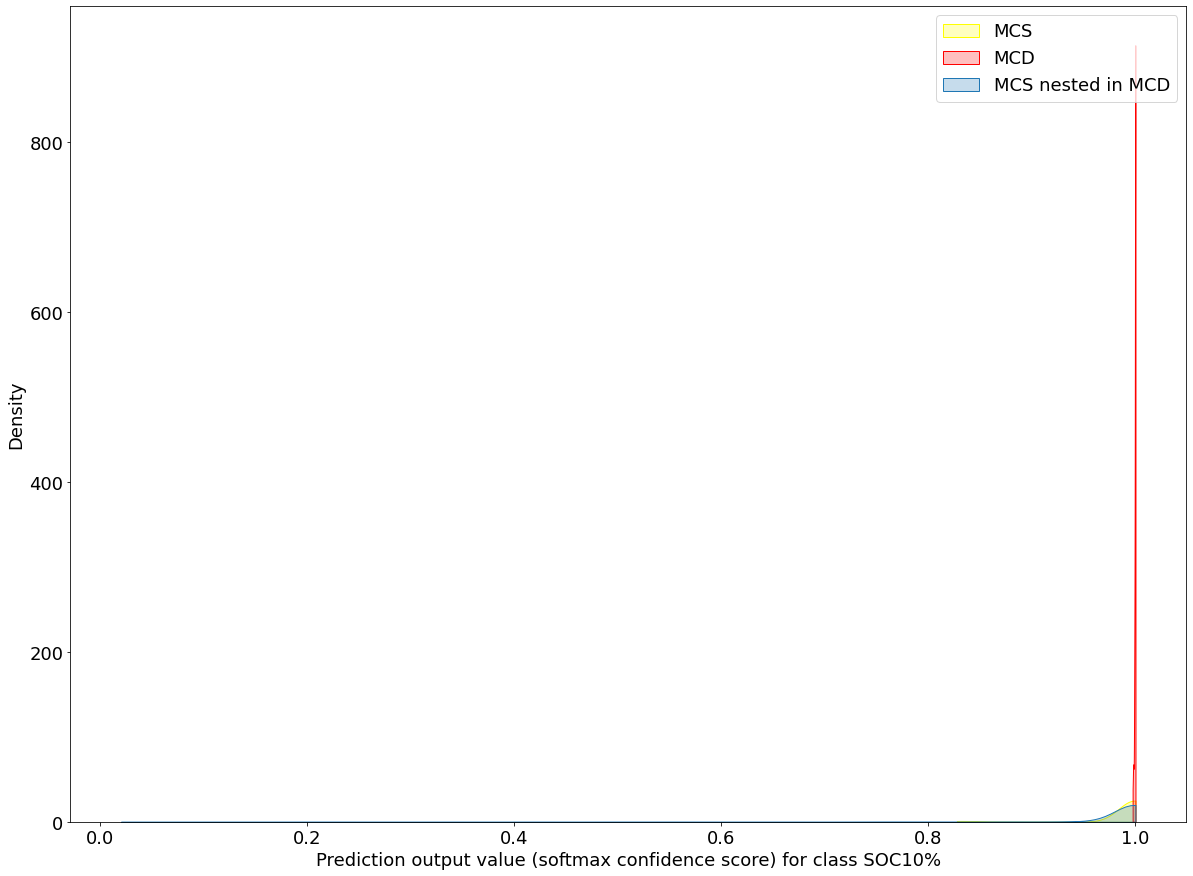

In [217]:
plot_MC_distribution_softmax(0)

d:\Temp\ipykernel_18892\944309970.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
d:\Temp\ipykernel_18892\944309970.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
d:\Temp\ipykernel_18892\944309970.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,:,class_index].reshape(-1,1), cut=0, shade=True, color='lightblue')


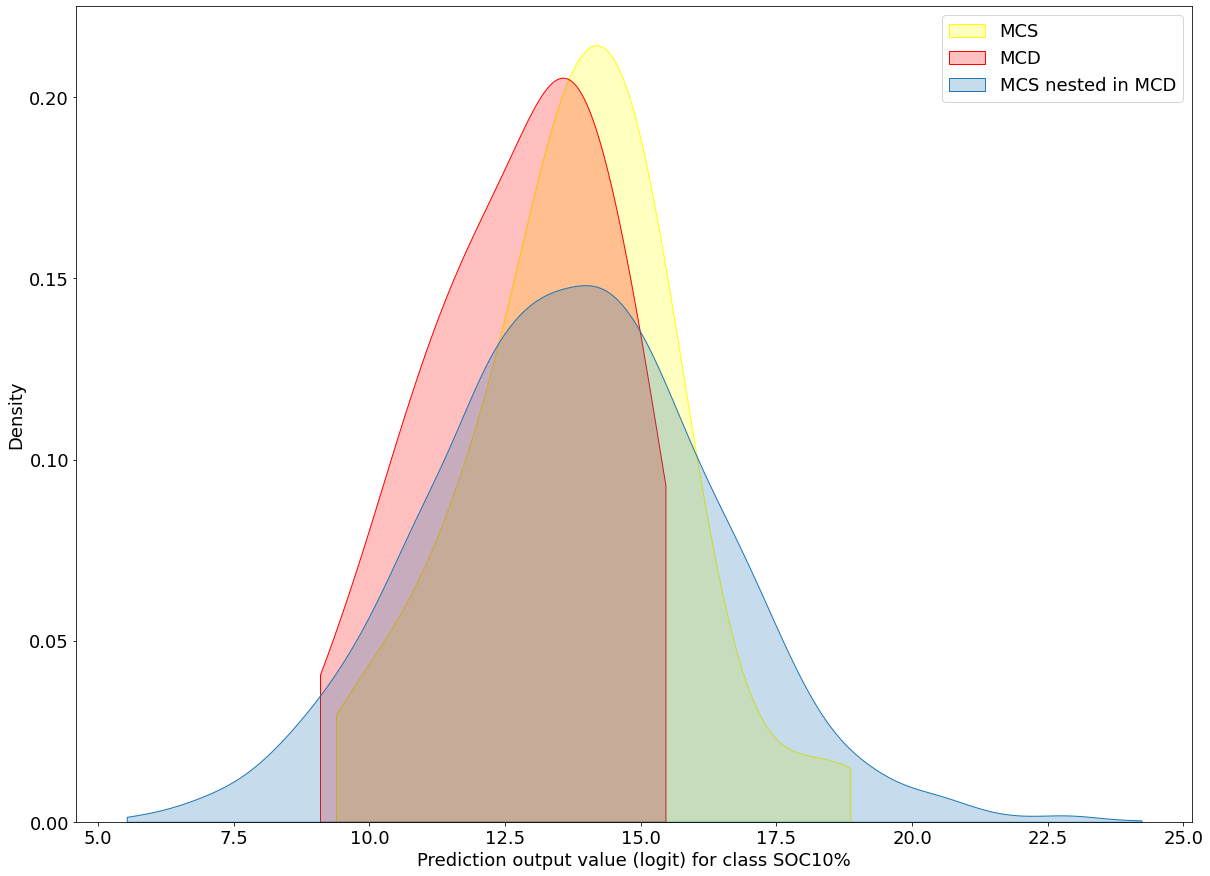

In [218]:
plot_MC_distribution_logit(0)

d:\Temp\ipykernel_18892\3206781501.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
d:\Temp\ipykernel_18892\3206781501.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
d:\Temp\ipykernel_18892\3206781501.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,:,class_index].reshape(-1,1), cut=0, shade=True, color='lightblue')


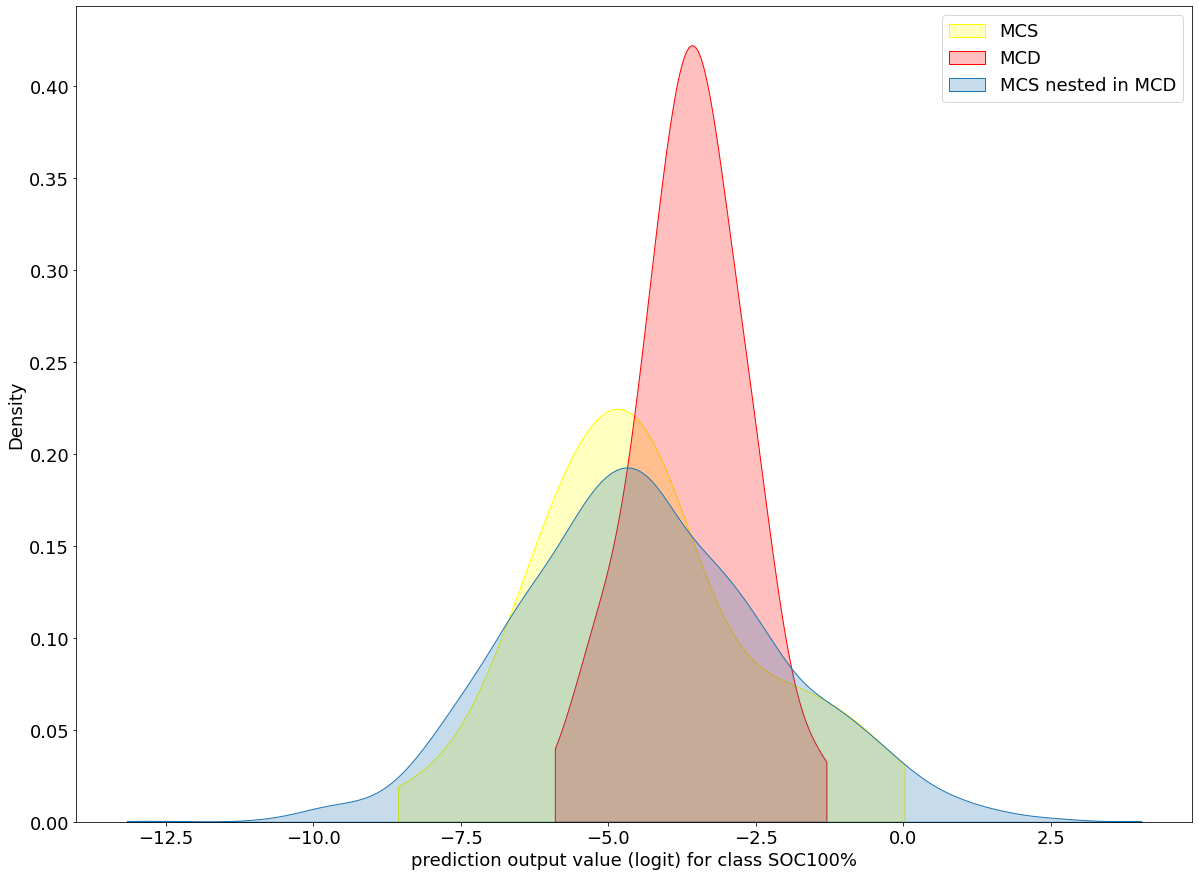

In [209]:
plot_MC_distribution_logit(1)

d:\Temp\ipykernel_18892\3647971695.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
d:\Temp\ipykernel_18892\3647971695.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
d:\Temp\ipykernel_18892\3647971695.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')


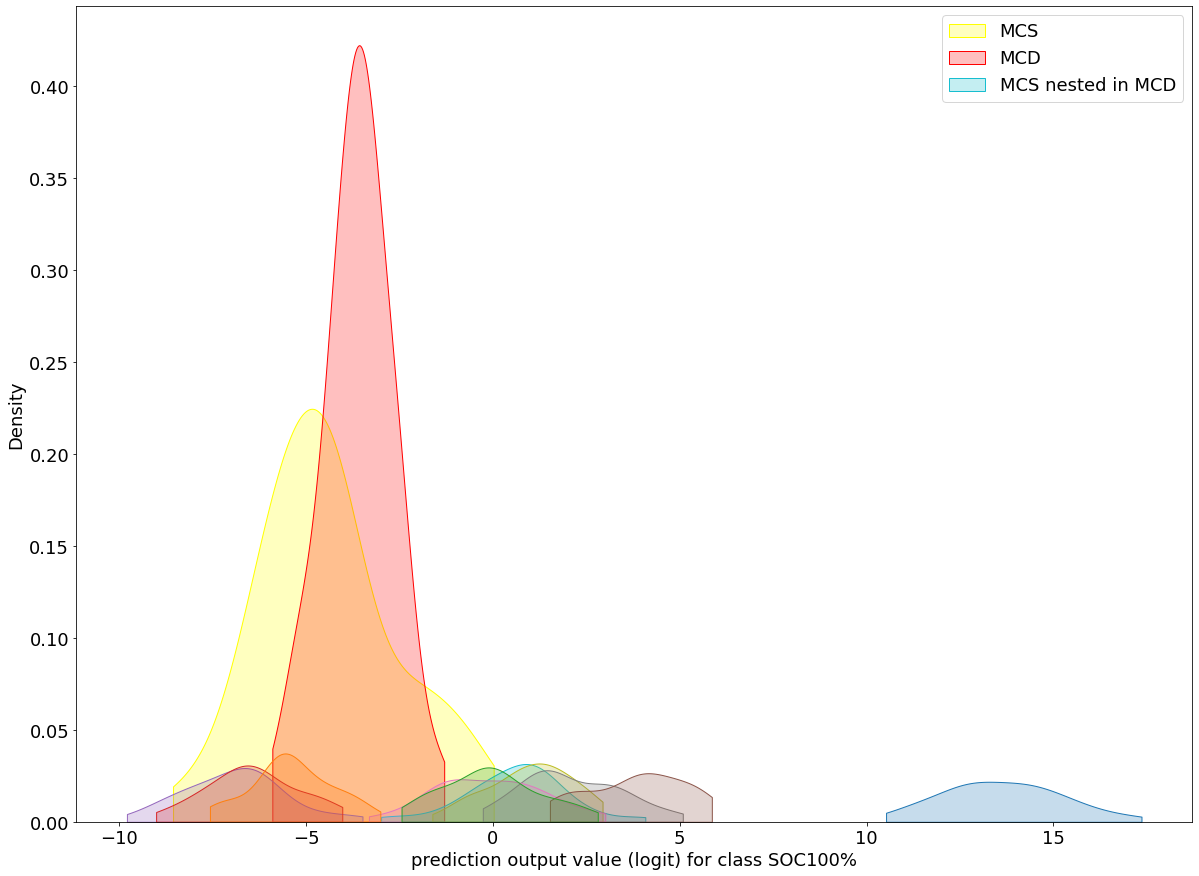

In [117]:
plot_MC_distribution_logit(1)

d:\Temp\ipykernel_18892\3647971695.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
d:\Temp\ipykernel_18892\3647971695.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
d:\Temp\ipykernel_18892\3647971695.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')


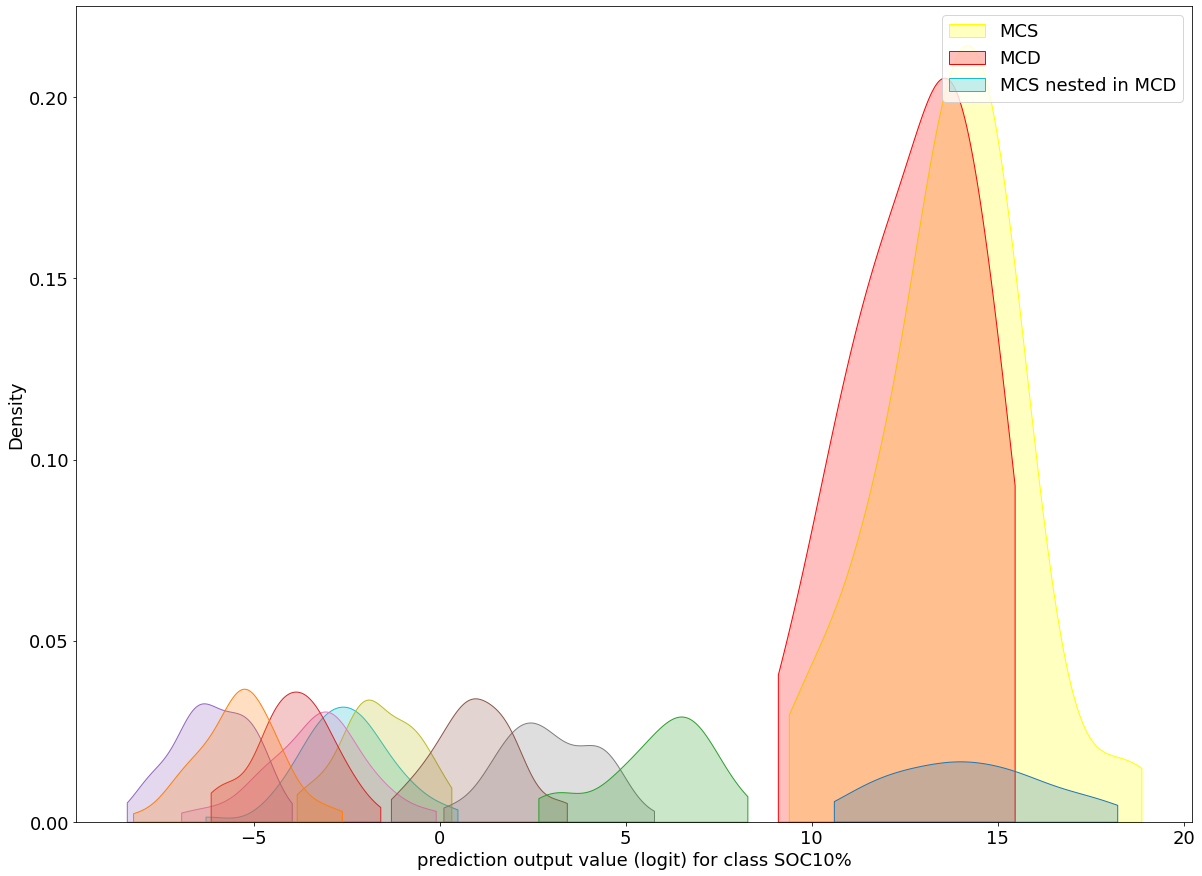

In [118]:
plot_MC_distribution_logit(0)

d:\Temp\ipykernel_18892\1173049414.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
d:\Temp\ipykernel_18892\1173049414.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
d:\Temp\ipykernel_18892\1173049414.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')


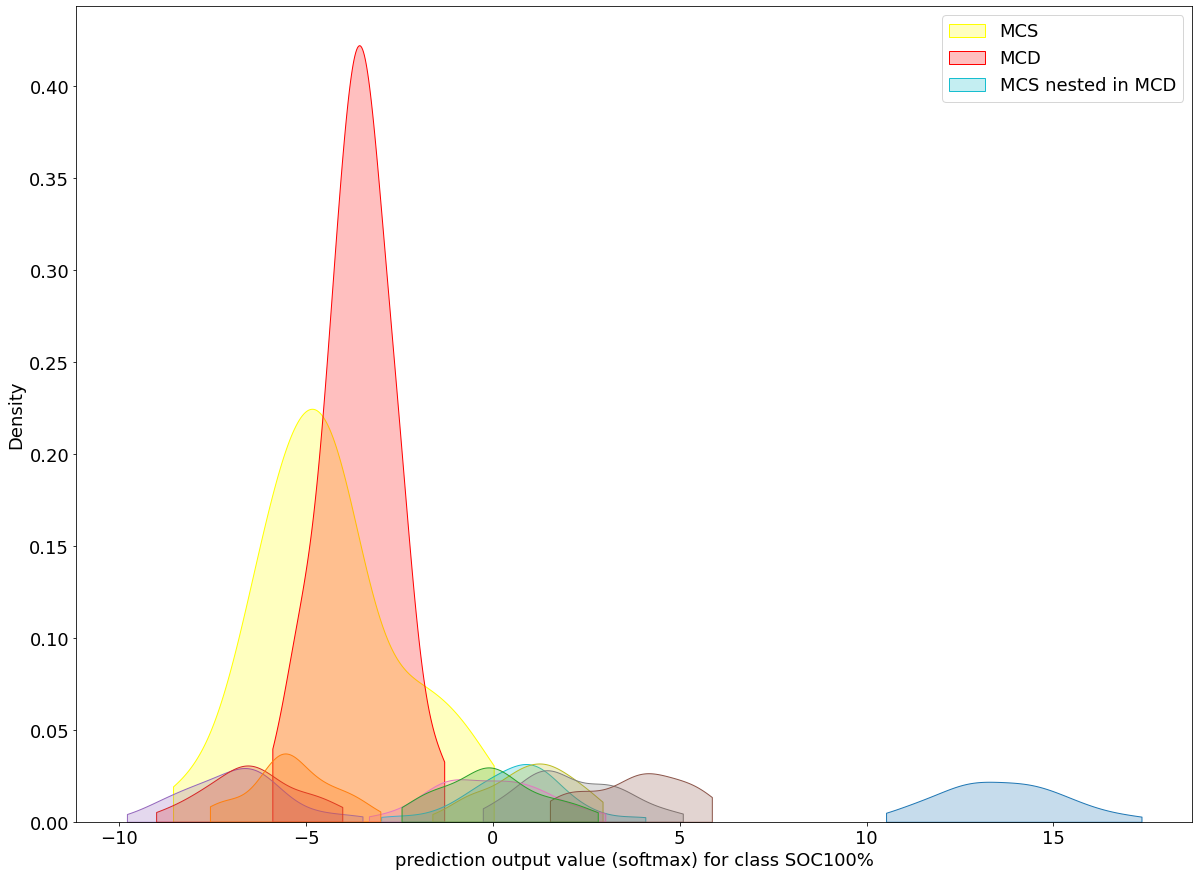

In [119]:
plot_MC_distribution_softmax(1)

d:\Temp\ipykernel_18892\1121276005.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')


<AxesSubplot:ylabel='Density'>

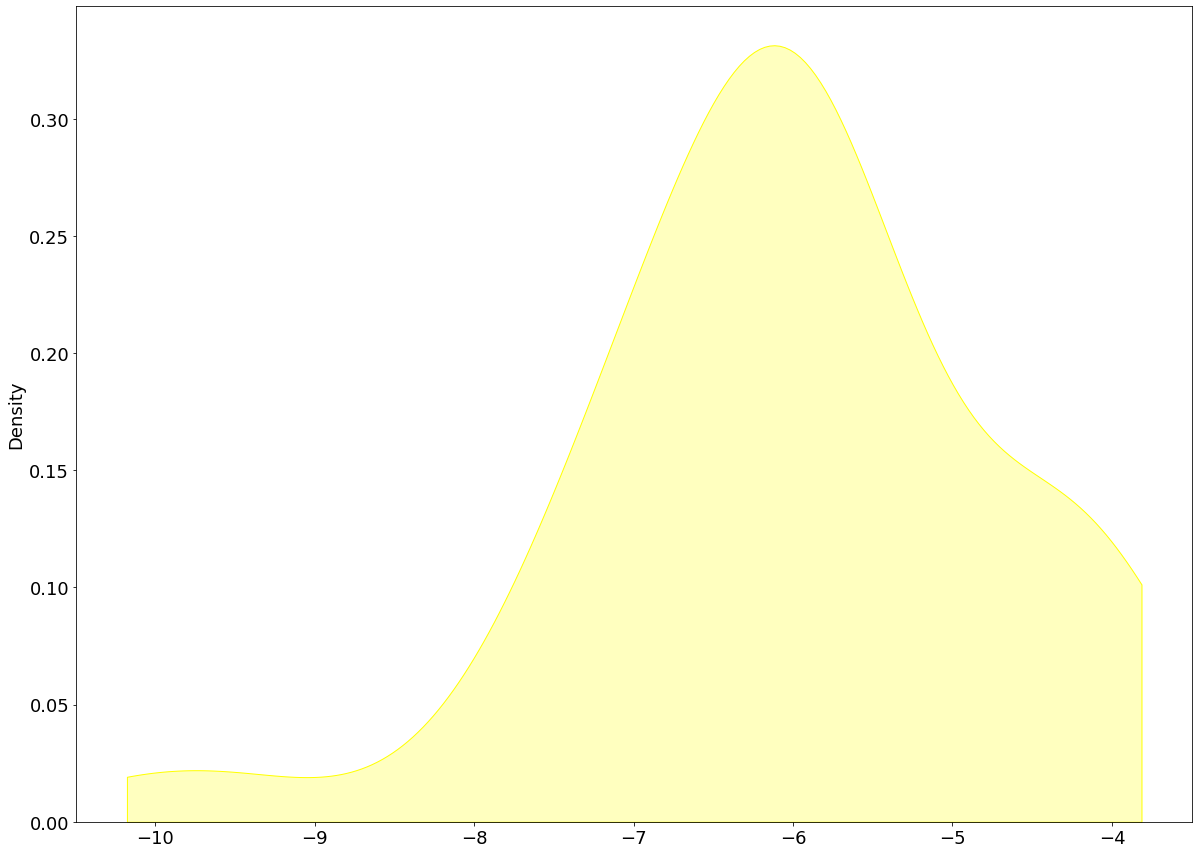

In [125]:
plt.figure(figsize=(20,15))
#label font size
plt.rcParams.update({'font.size': 18})

sns.kdeplot(y_pred_dist_MCS_logit[:,class_index], cut=0, shade=True, color='yellow')
#sns.kdeplot(y_pred_dist_MCD_logit[:,class_index], color='red', cut=0, shade=True)
#sns.kdeplot(y_pred_dist_MCD_MCS_logit[:,class_index], cut=0, shade=True, color='lightblue')

KeyboardInterrupt: 

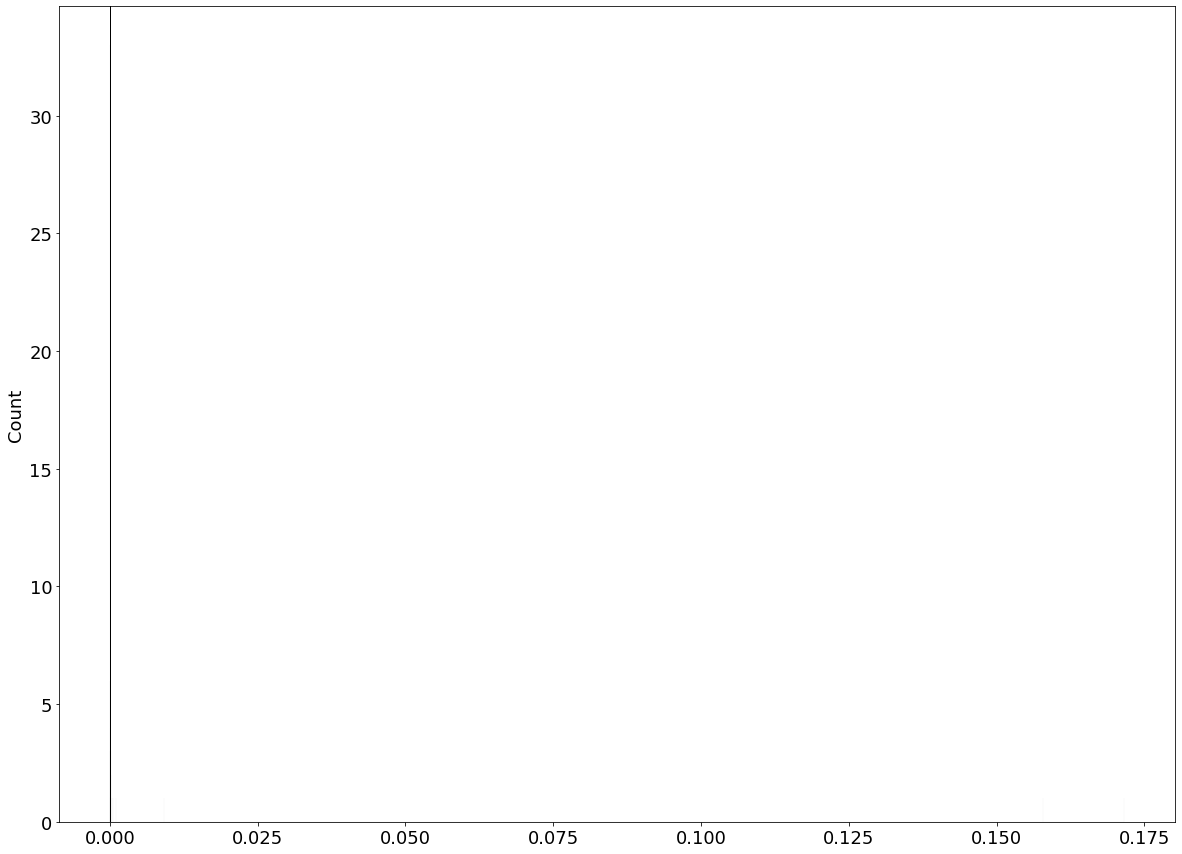

In [123]:
histplot_MC_distribution_logit(8)